In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
df = pd.read_parquet("/content/drive/MyDrive/DBDA_project_files/preprocessing/US_Accidents2.parquet")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   ID                     object  
 1   Source                 category
 2   Severity               int8    
 3   Start_Time             object  
 4   End_Time               object  
 5   Start_Lat              float32 
 6   Start_Lng              float32 
 7   End_Lat                float32 
 8   End_Lng                float32 
 9   Distance(mi)           float32 
 10  Description            object  
 11  Street                 object  
 12  City                   category
 13  County                 category
 14  State                  category
 15  Zipcode                object  
 16  Country                category
 17  Timezone               category
 18  Airport_Code           category
 19  Weather_Timestamp      object  
 20  Temperature(F)         float32 
 21  Wind_Chill(F)          float32 

In [ ]:
df.shape

(7728394, 46)

In [ ]:
pd.set_option('display.max_columns', None)
# pd.set_option('display.max_rows', None)

In [ ]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.900002,NaN,91.0,29.680000,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.900002,NaN,100.0,29.650000,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.000000,33.299999,100.0,29.670000,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.099998,31.000000,96.0,29.639999,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.000000,33.299999,89.0,29.650000,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [ ]:
numerical_cols = ['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Temperature(F)',
                  'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']
categorical_cols = ['Severity', 'Source', 'City', 'County', 'State', 'Country', 'Timezone', 'Airport_Code', 'Wind_Direction',
                    'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']
object_cols = ['ID', 'Start_Time', 'End_Time', 'Description', 'Street', 'Zipcode', 'Weather_Timestamp']
bool_cols = ['Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop']

In [ ]:
# downcasting object to category

In [ ]:
# for col in df.select_dtypes(include=['bool']).columns:
    # print(f"'{col}',", end="")

'Amenity','Bump','Crossing','Give_Way','Junction','No_Exit','Railway','Roundabout','Station','Stop','Traffic_Calming','Traffic_Signal','Turning_Loop',

In [ ]:
# for col in categorical_cols:
    # df[col] = df[col].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 46 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   ID                     object  
 1   Source                 category
 2   Severity               int8    
 3   Start_Time             object  
 4   End_Time               object  
 5   Start_Lat              float32 
 6   Start_Lng              float32 
 7   End_Lat                float32 
 8   End_Lng                float32 
 9   Distance(mi)           float32 
 10  Description            object  
 11  Street                 object  
 12  City                   category
 13  County                 category
 14  State                  category
 15  Zipcode                object  
 16  Country                category
 17  Timezone               category
 18  Airport_Code           category
 19  Weather_Timestamp      object  
 20  Temperature(F)         float32 
 21  Wind_Chill(F)          float32 

In [ ]:
# path = "/content/drive/MyDrive/DBDA_project_files/preprocessing/US_Accidents2.parquet"
# df.to_parquet(path)

In [ ]:
missing = df.isna().sum()
missing[missing > 0]

,0
End_Lat,3402762
End_Lng,3402762
Description,5
Street,10869
City,253
Zipcode,1915
Timezone,7808
Airport_Code,22635
Weather_Timestamp,120228
Temperature(F),163853


In [ ]:
missing_percent = df.isna().mean()*100
missing_percent[missing_percent > 0]

,0
End_Lat,44.029355
End_Lng,44.029355
Description,0.000065
Street,0.140637
City,0.003274
Zipcode,0.024779
Timezone,0.101030
Airport_Code,0.292881
Weather_Timestamp,1.555666
Temperature(F),2.120143


In [ ]:
new_df = df.drop(columns=['Wind_Chill(F)', 'Precipitation(in)', 'ID', 'Source', 'End_Time', 'End_Lat', 'End_Lng',
'Description', 'Street', 'Country', 'Airport_Code', 'Weather_Timestamp',
'County', 'Zipcode', 'Timezone', 'City','Turning_Loop', 'Traffic_Calming', 'Roundabout', 'Bump', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
'Astronomical_Twilight'])
new_df.isna().sum()

,0
Severity,0
Start_Time,0
Start_Lat,0
Start_Lng,0
Distance(mi),0
State,0
Temperature(F),163853
Humidity(%),174144
Pressure(in),140679
Visibility(mi),177098


In [ ]:
missing = new_df.isna().mean()*100
missing[missing > 0]

,0
Temperature(F),2.120143
Humidity(%),2.253301
Pressure(in),1.820288
Visibility(mi),2.291524
Wind_Direction,2.267043
Wind_Speed(mph),7.391355
Weather_Condition,2.244438


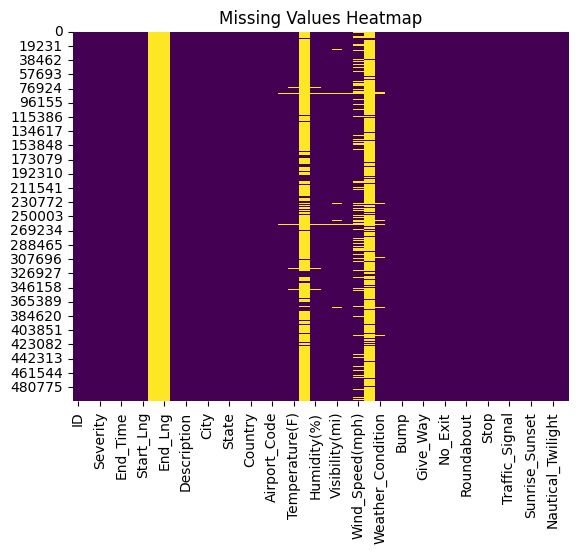

In [ ]:
# plotting missing values
chunk = df.iloc[:500000] # first 5k rows
sns.heatmap(chunk.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

<Axes: >

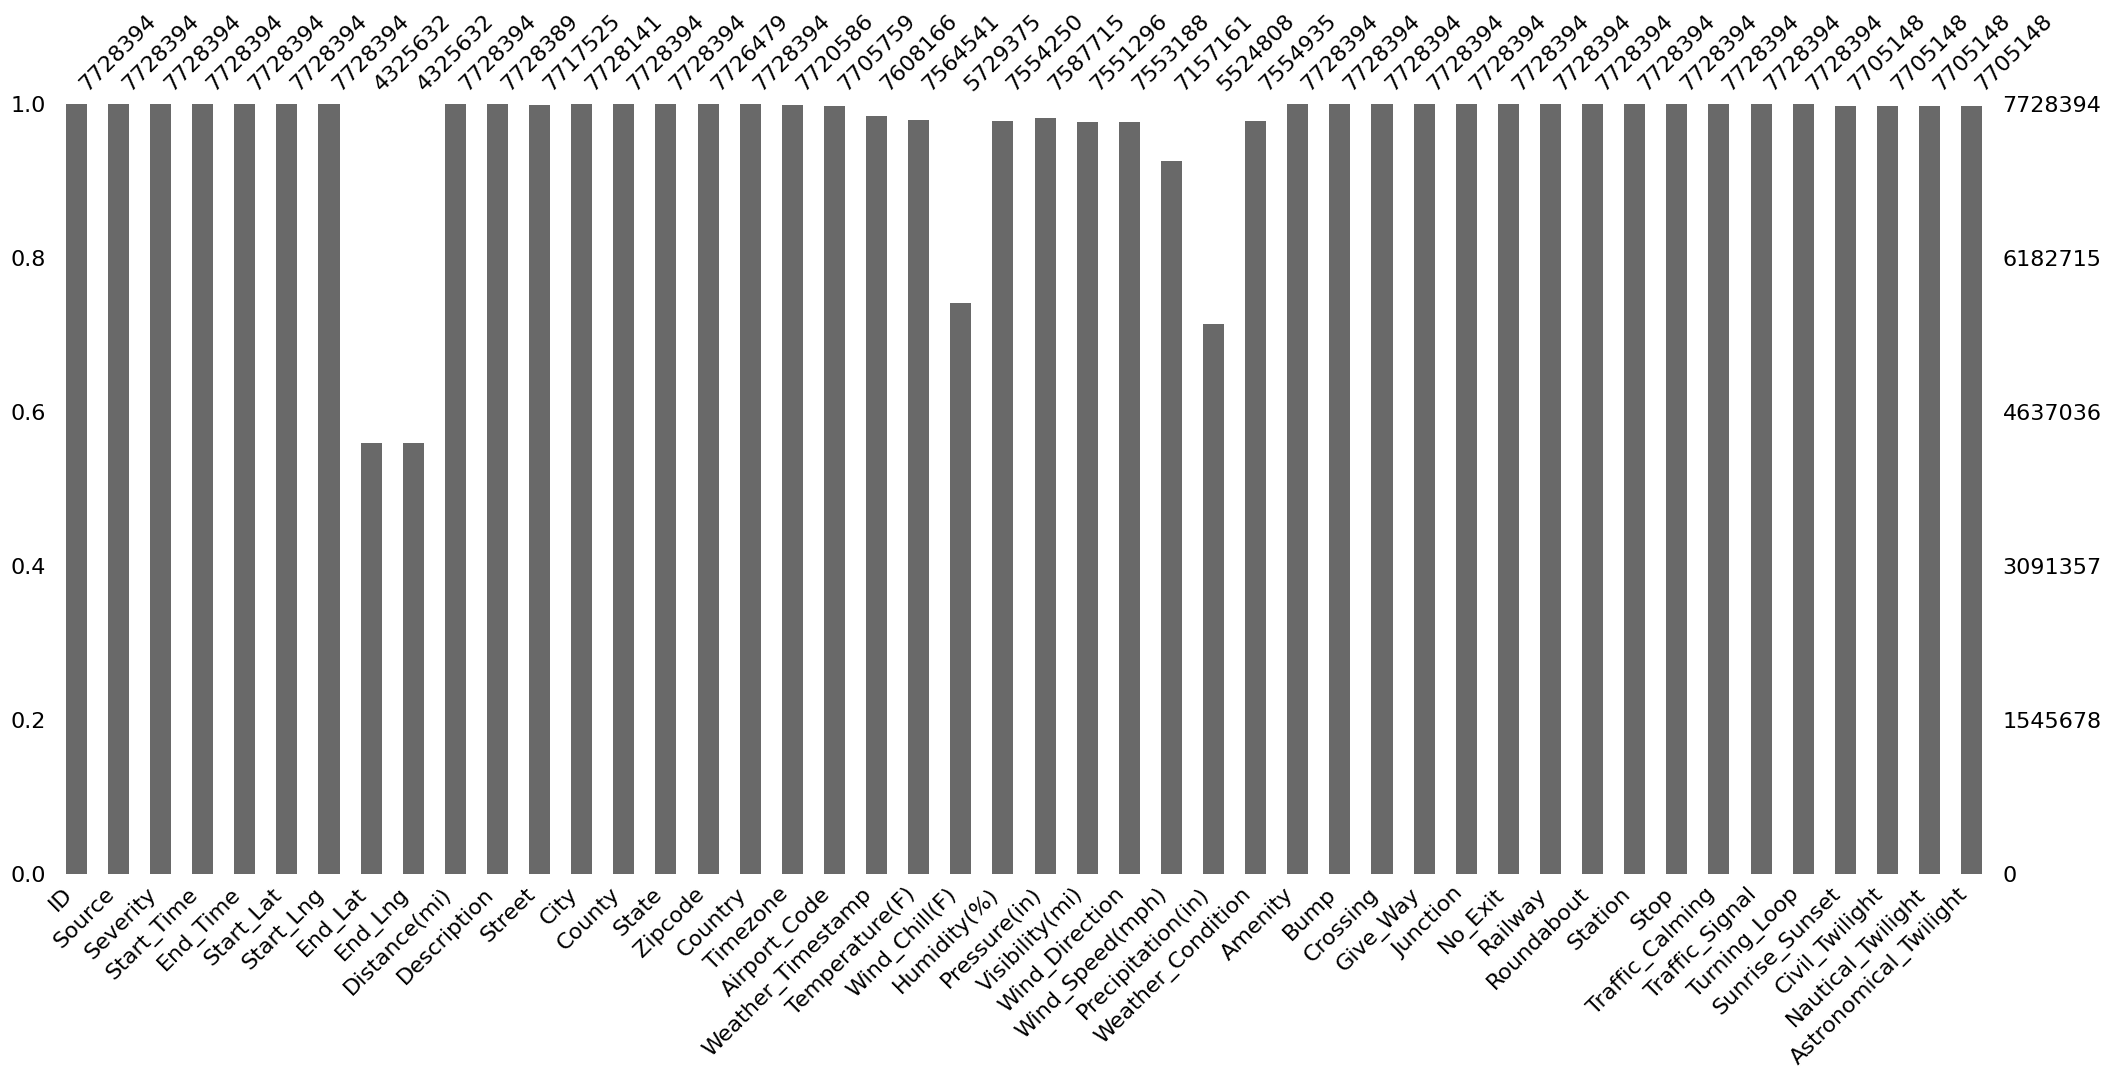

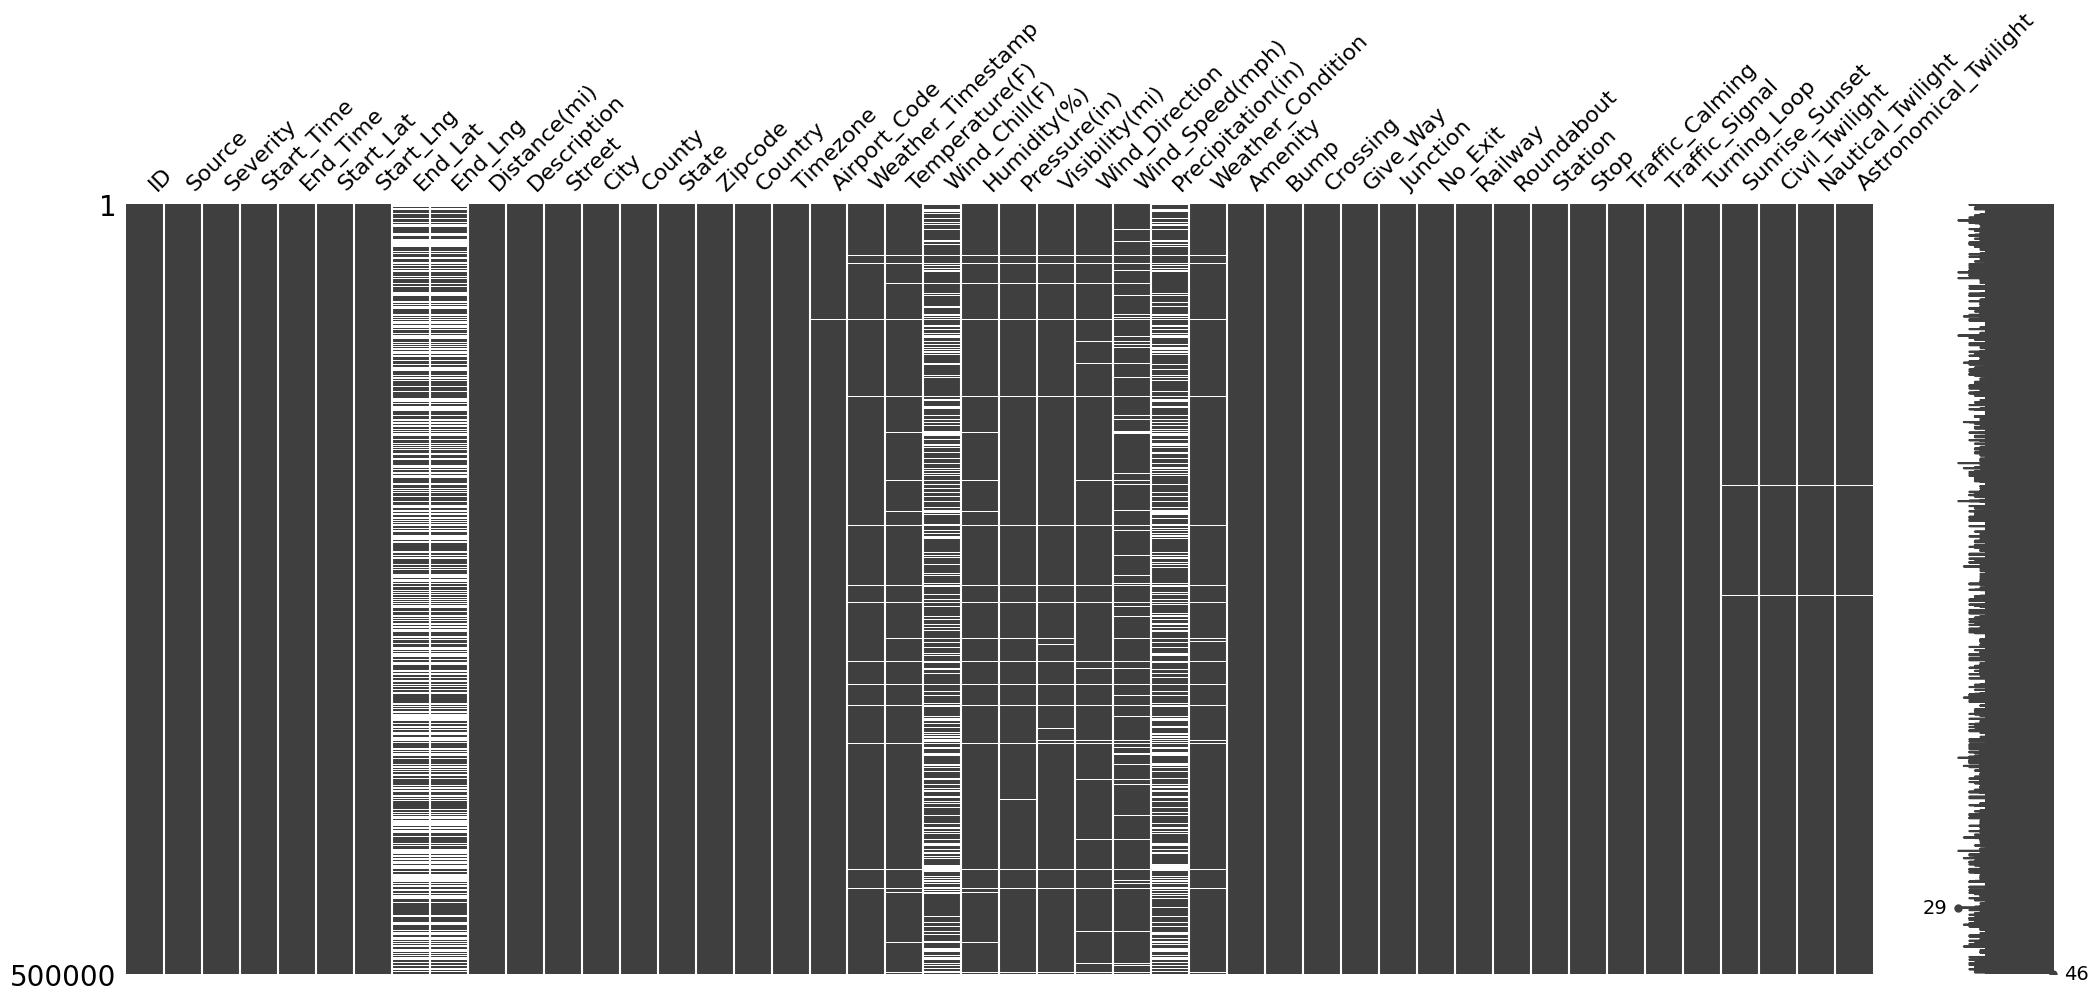

In [ ]:
import missingno as msno

# Bar chart of missing values
msno.bar(df)

# Matrix plot (sampled automatically)
msno.matrix(df.sample(500000))


In [ ]:
# outlier detection
def detect_outliers_iqr(data, k=1.5):
    """
    Detect outliers in numerical columns using IQR.
    Returns a dictionary with column names and outlier indices.
    """
    outliers = {}
    # numeric_cols = df.select_dtypes(include=[np.number]).columns

    for col in data.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - k * IQR
        upper_bound = Q3 + k * IQR
        outlier_idx = data[(data[col] < lower_bound) | (data[col] > upper_bound)].index
        outliers[col] = outlier_idx.tolist()

    return outliers

In [ ]:
outliers = detect_outliers_iqr(df[numerical_cols])
for key, value in outliers.items():
  print(key, len(value))
  # print(outliers)

Start_Lat 0
Start_Lng 0
End_Lat 0
End_Lng 0
Distance(mi) 963606
Temperature(F) 50515
Wind_Chill(F) 43869
Humidity(%) 0
Pressure(in) 443383
Visibility(mi) 1481065
Wind_Speed(mph) 210603
Precipitation(in) 533090


In [ ]:
df['Severity'].unique()

array([3, 2, 1, 4], dtype=int8)

# **Univariate** **Analysis**

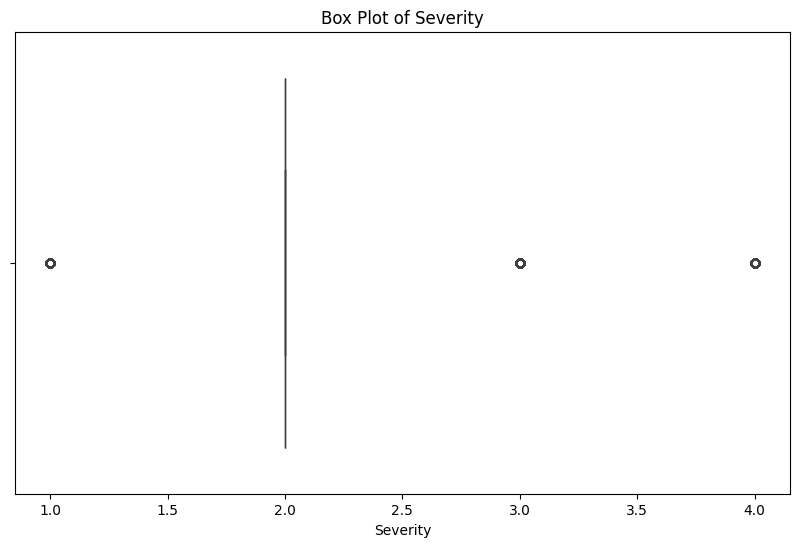

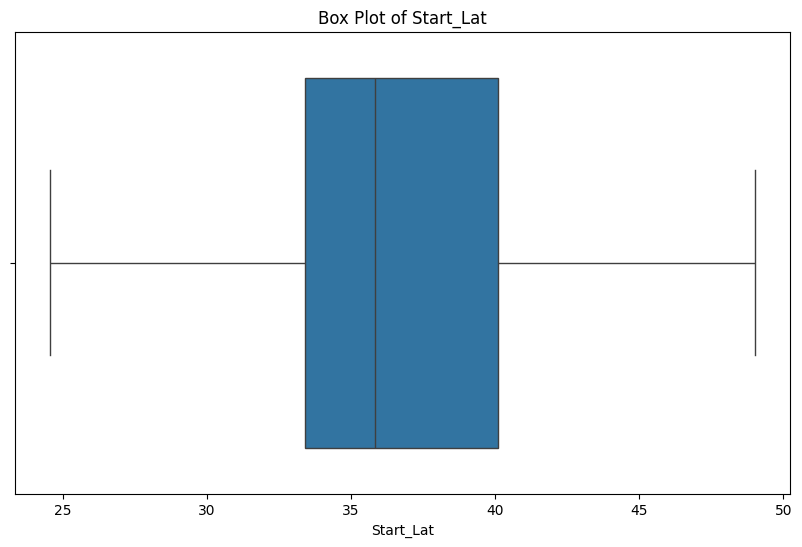

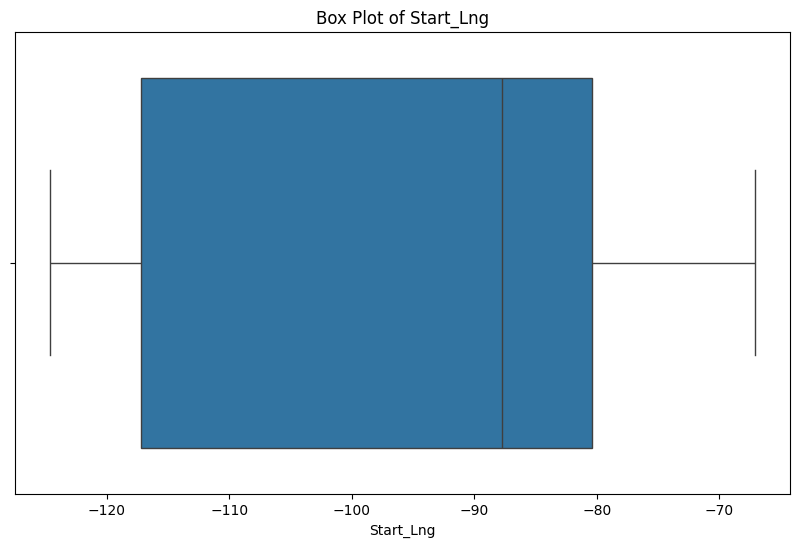

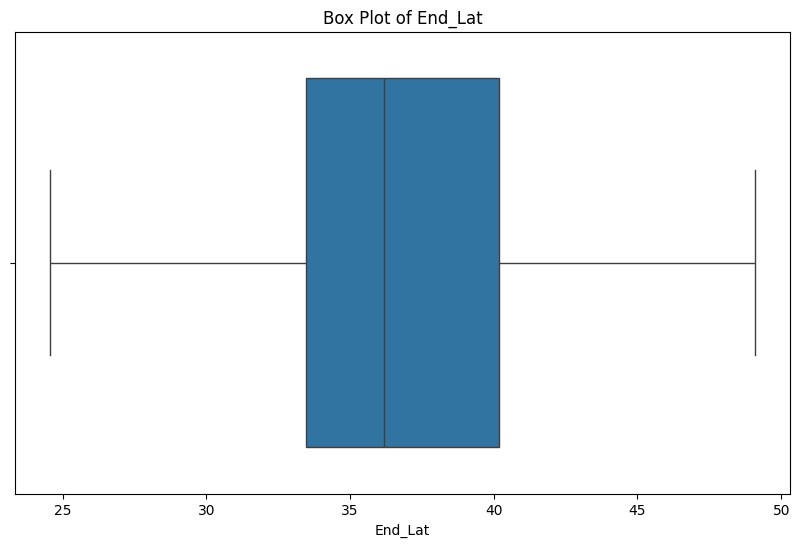

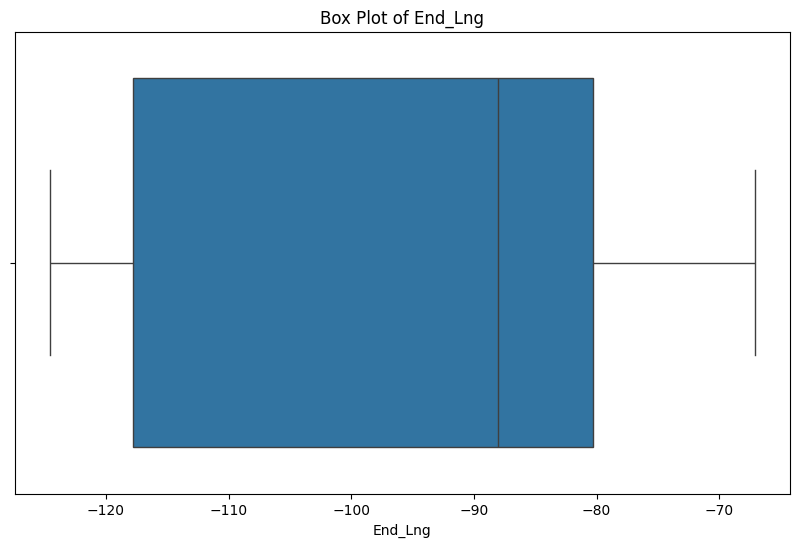

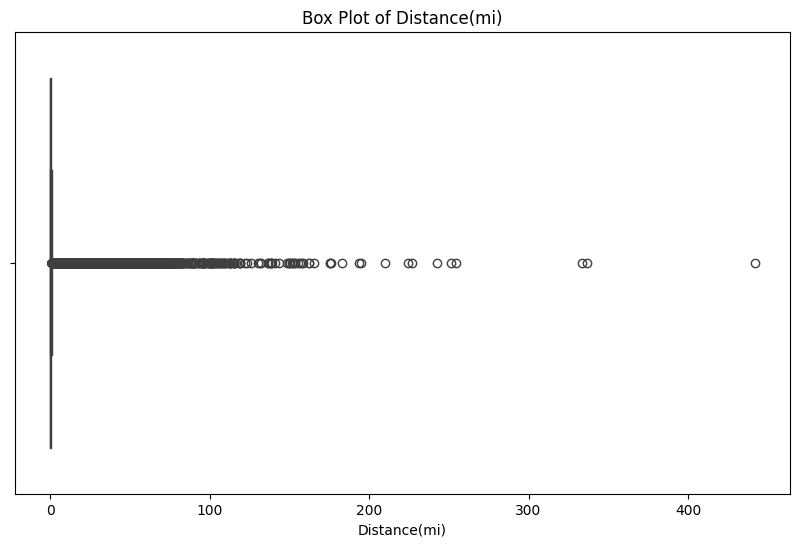

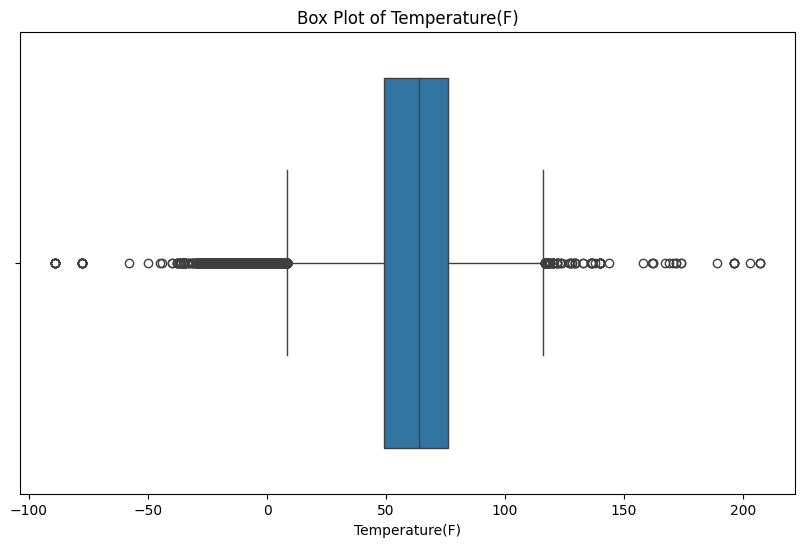

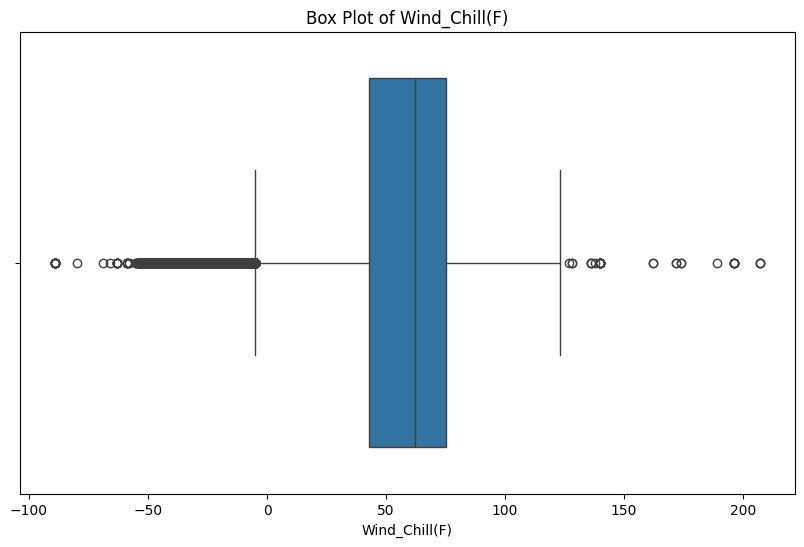

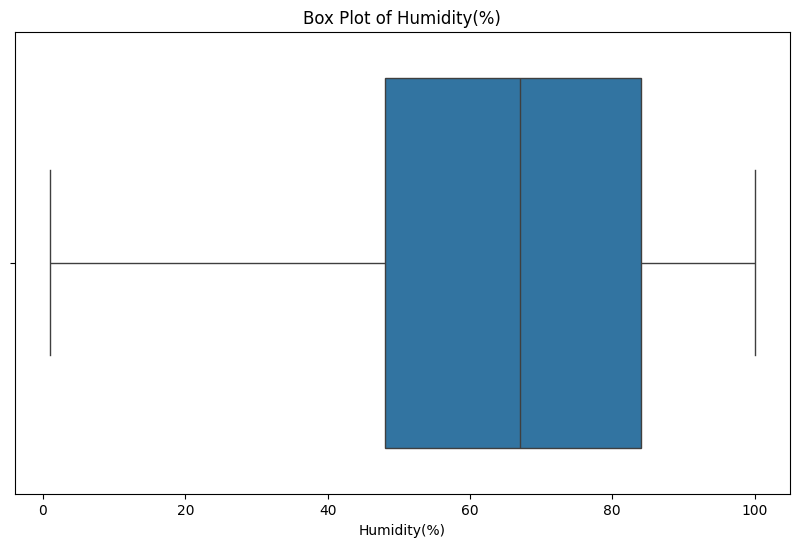

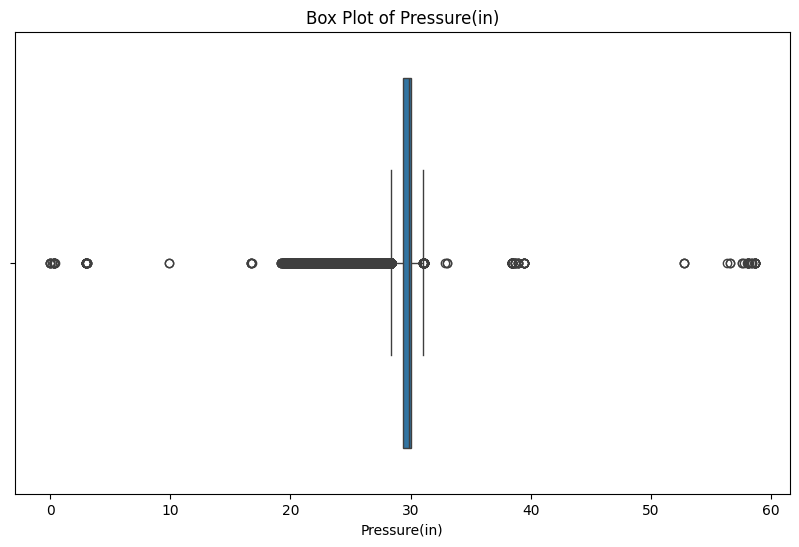

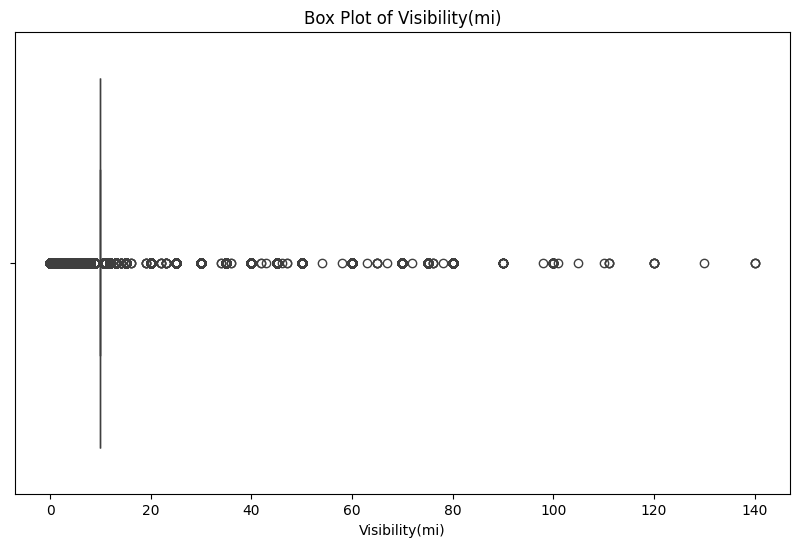

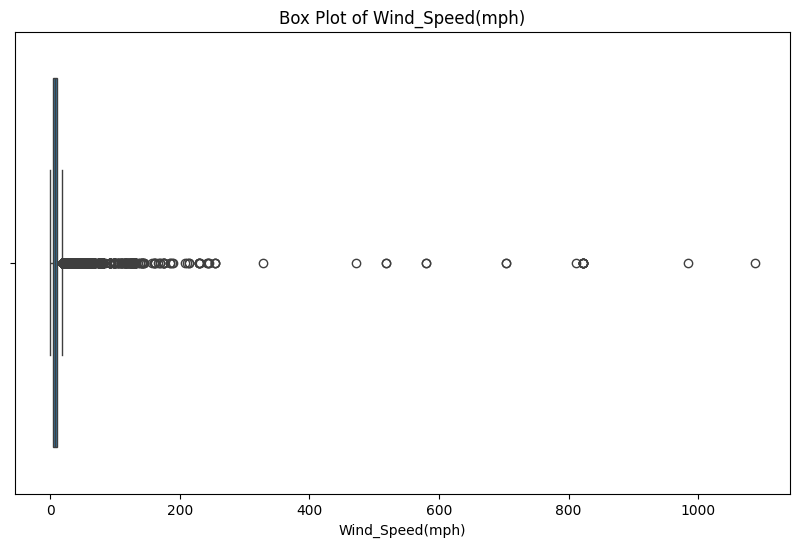

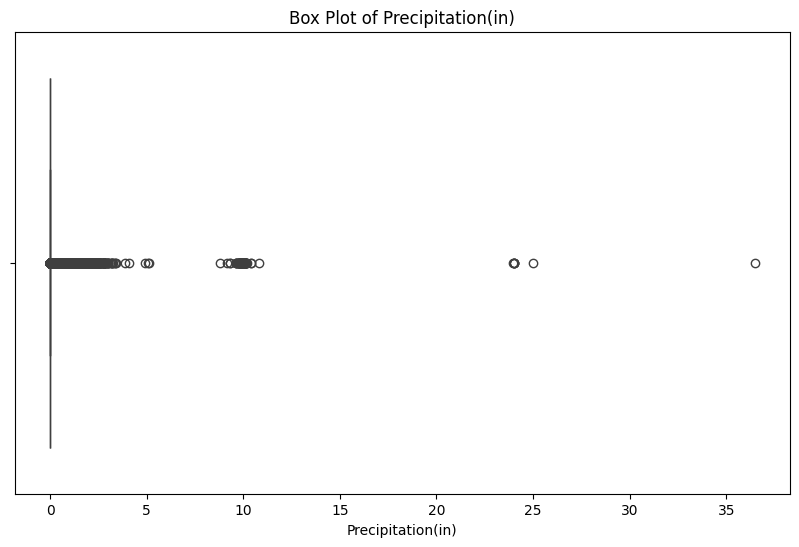

In [ ]:
# plotting outliers
for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()

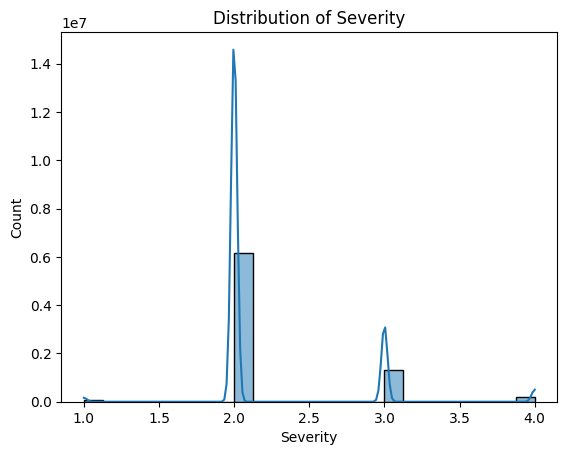

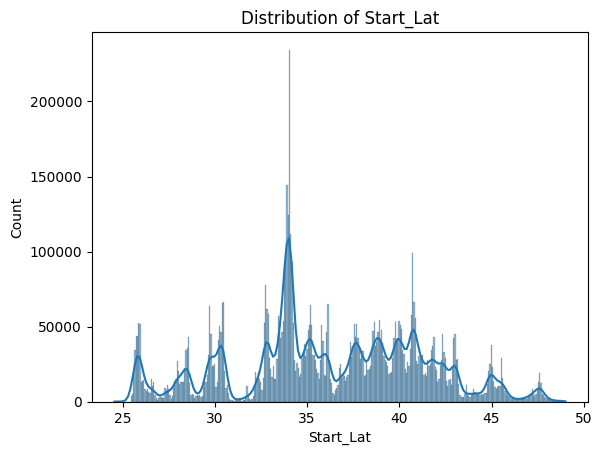

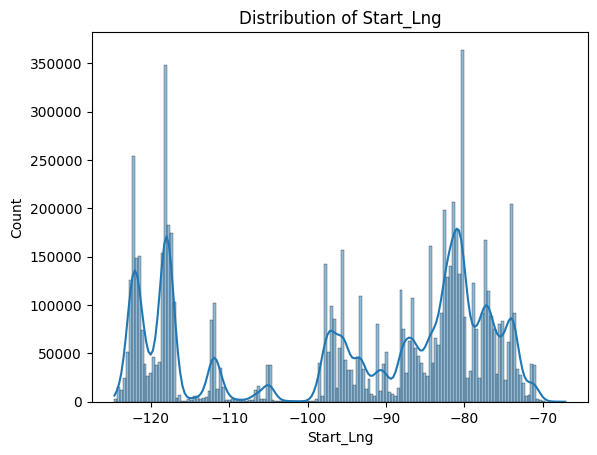

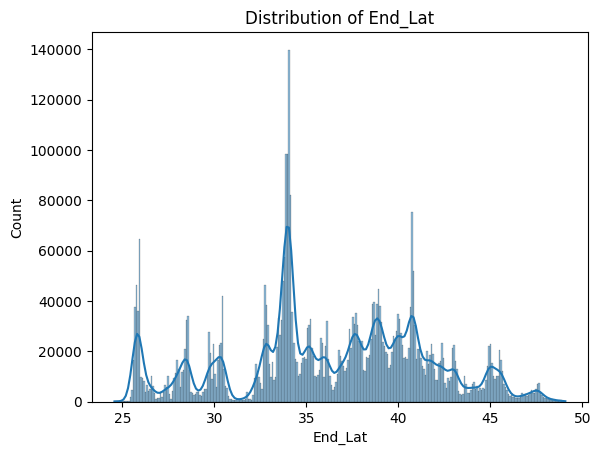

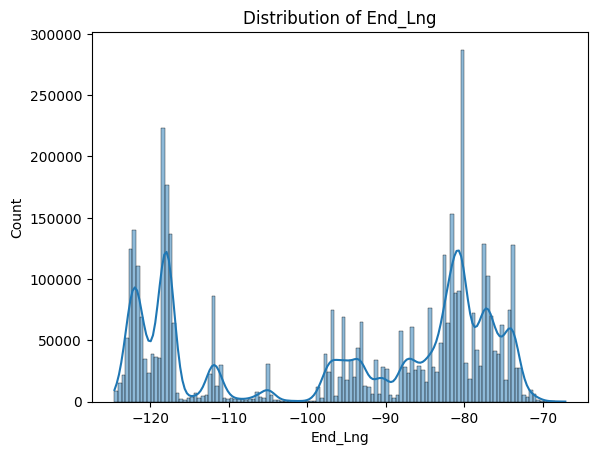

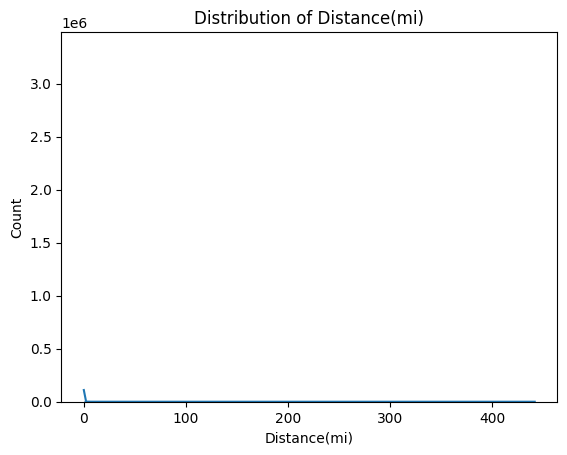

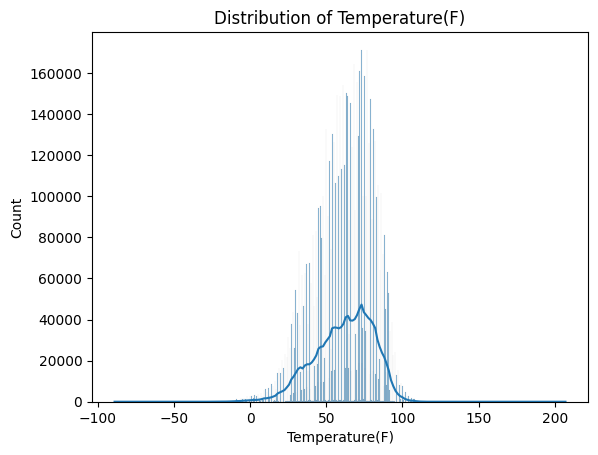

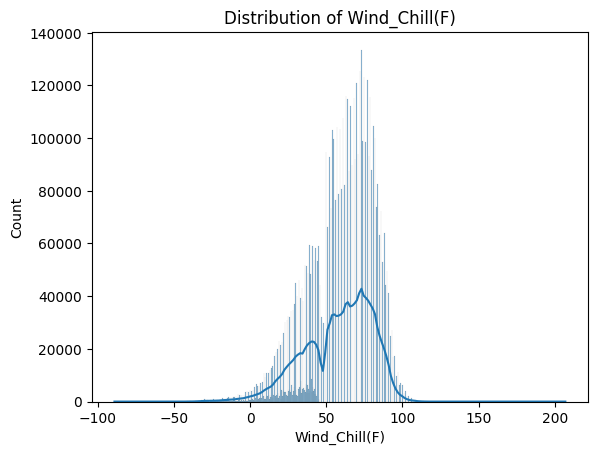

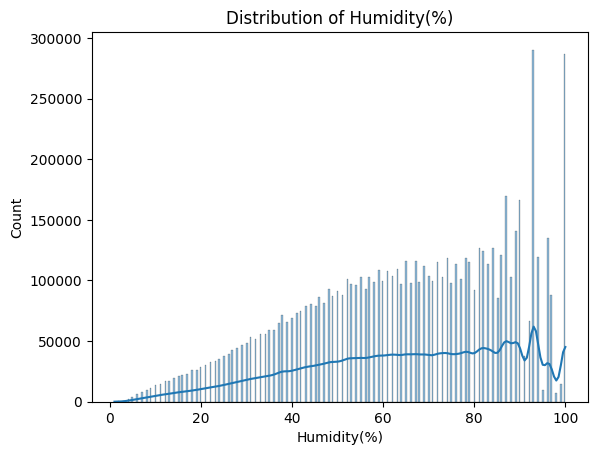

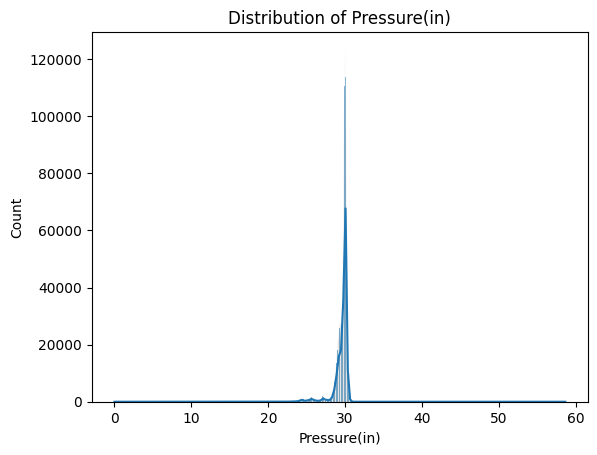

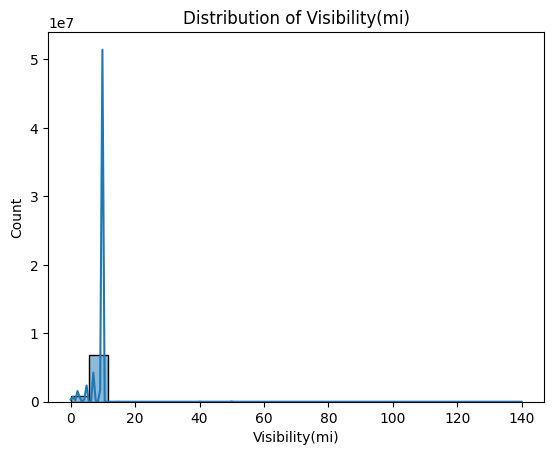

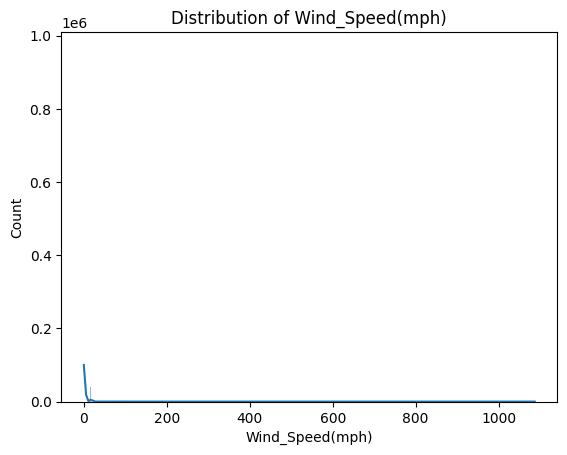

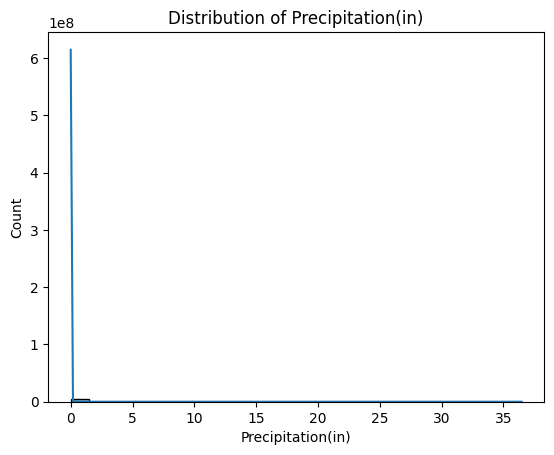

In [ ]:
# distribution

for col in numerical_cols:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


/tmp/ipython-input-3840711427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='muted')


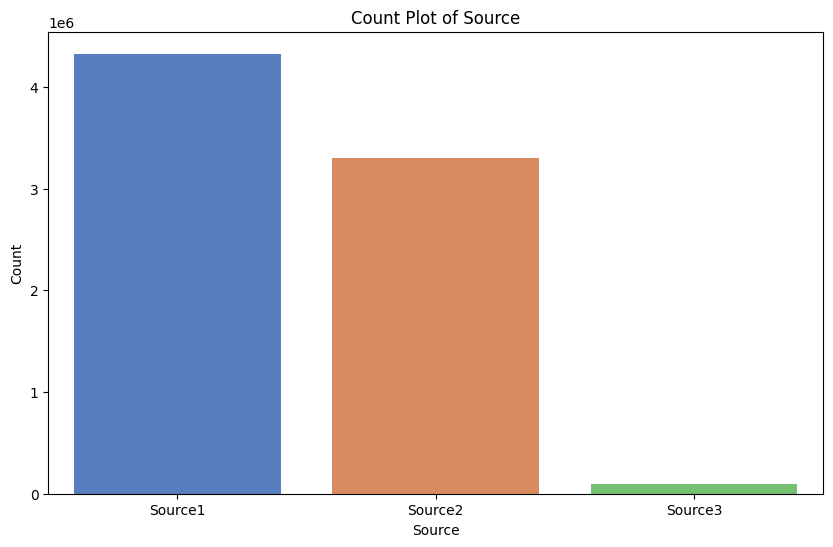

/tmp/ipython-input-3840711427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='muted')


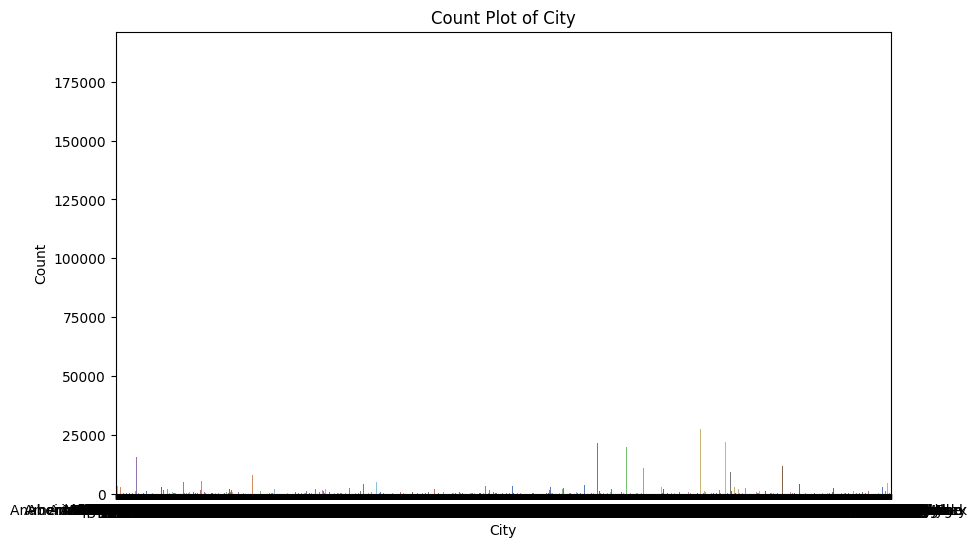

/tmp/ipython-input-3840711427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='muted')


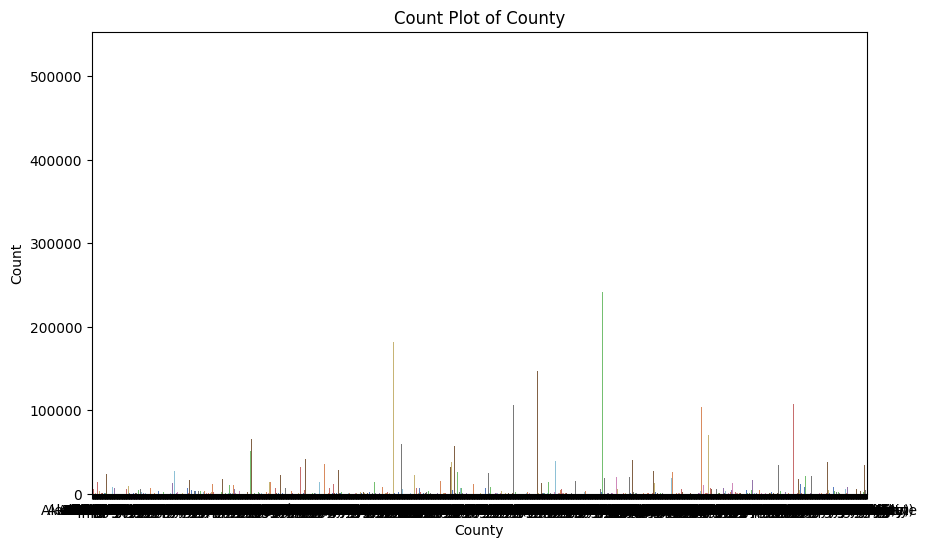

/tmp/ipython-input-3840711427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='muted')


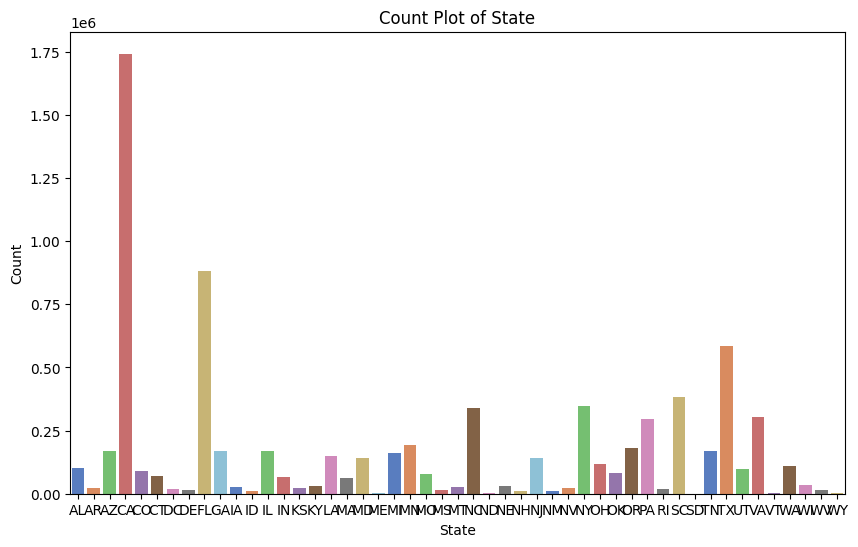

/tmp/ipython-input-3840711427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='muted')


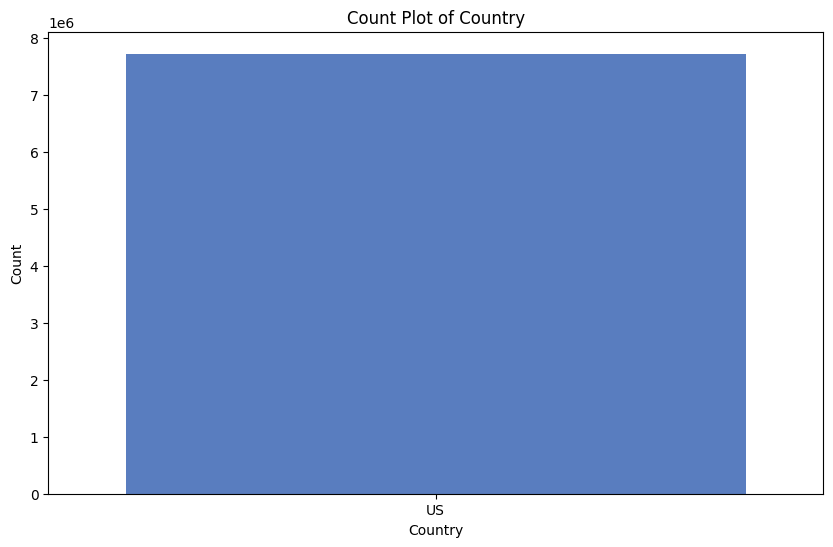

/tmp/ipython-input-3840711427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='muted')


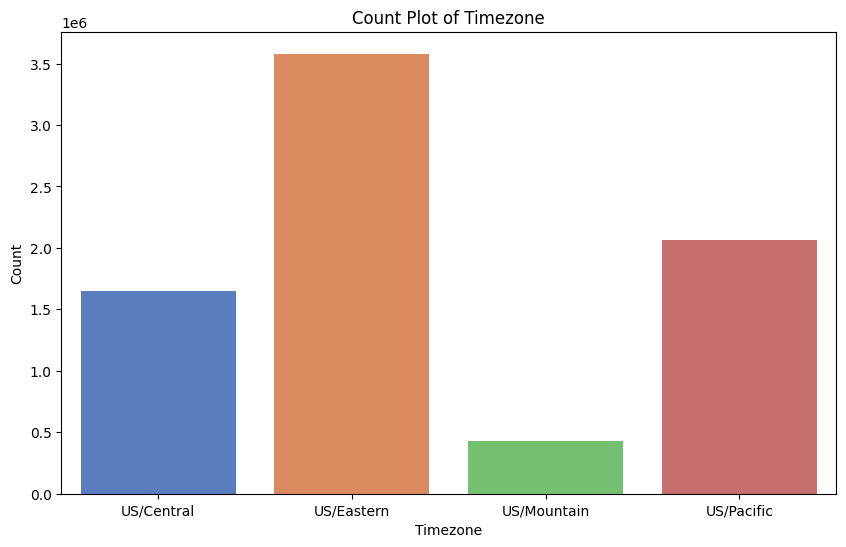

/tmp/ipython-input-3840711427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='muted')


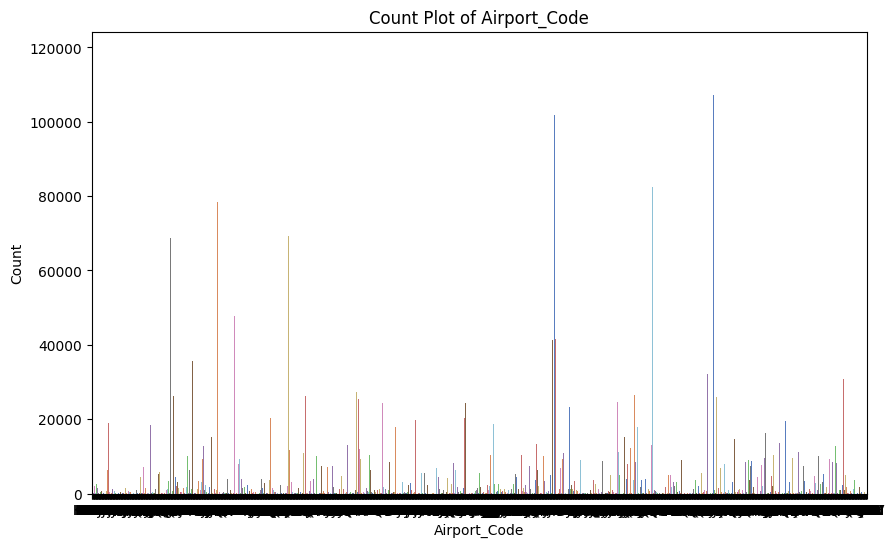

/tmp/ipython-input-3840711427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='muted')


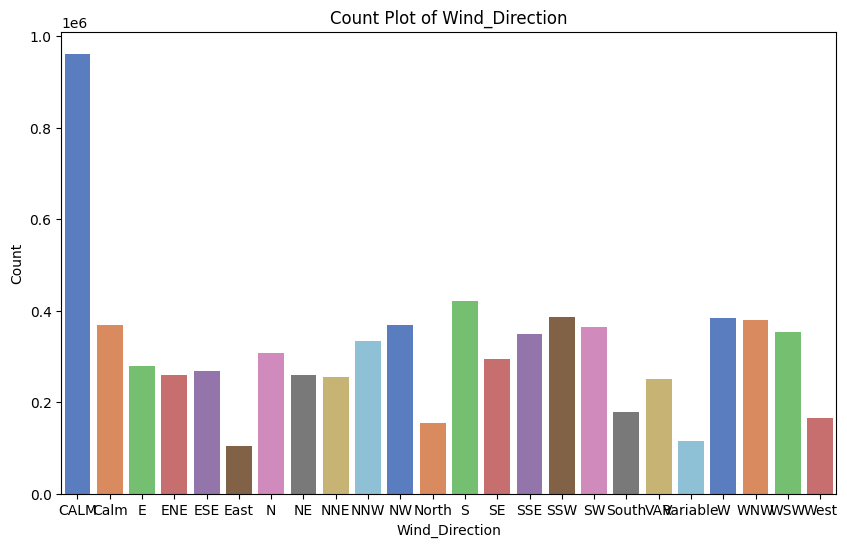

/tmp/ipython-input-3840711427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='muted')


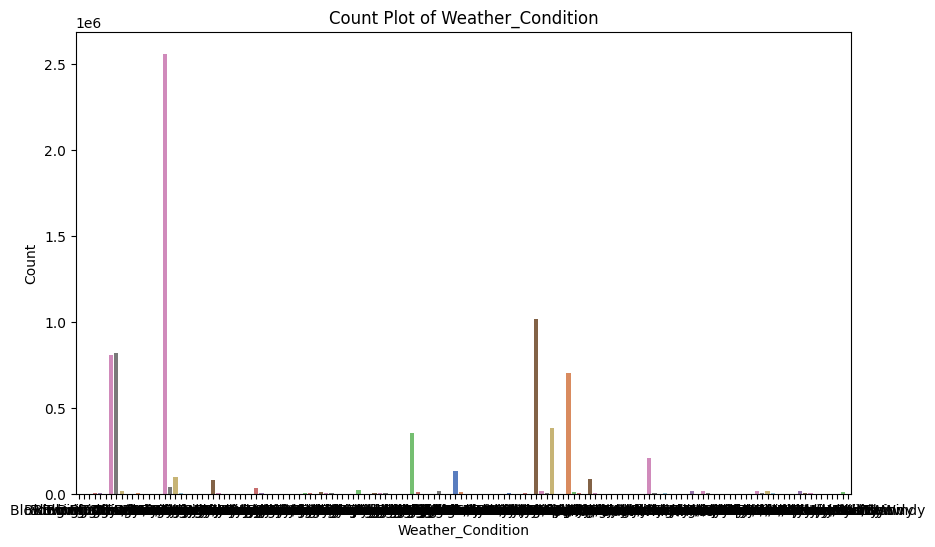

/tmp/ipython-input-3840711427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='muted')


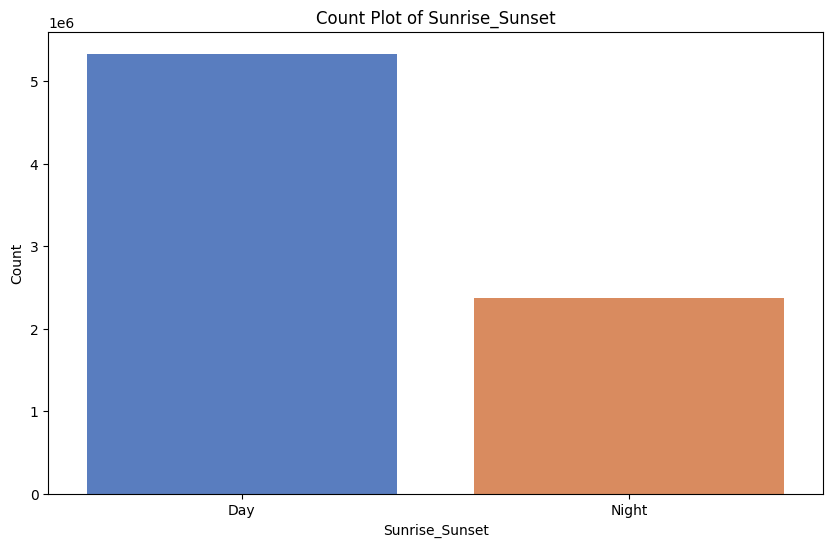

/tmp/ipython-input-3840711427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='muted')


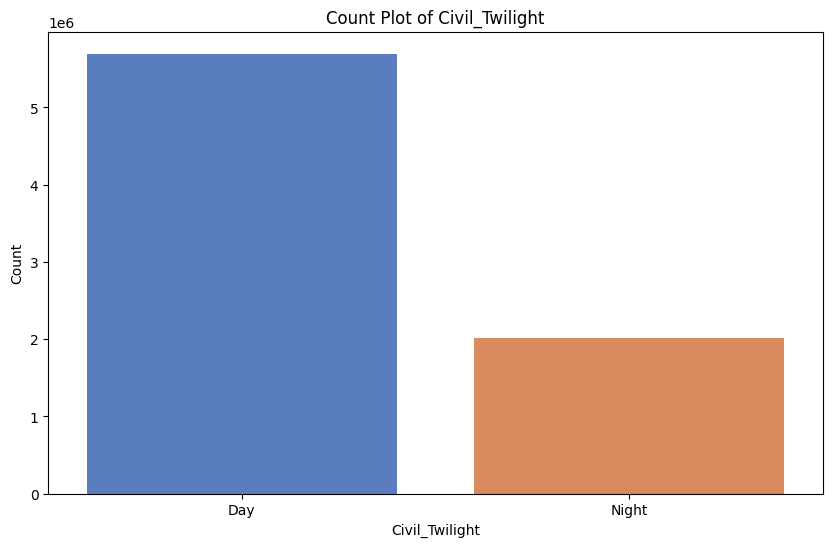

/tmp/ipython-input-3840711427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='muted')


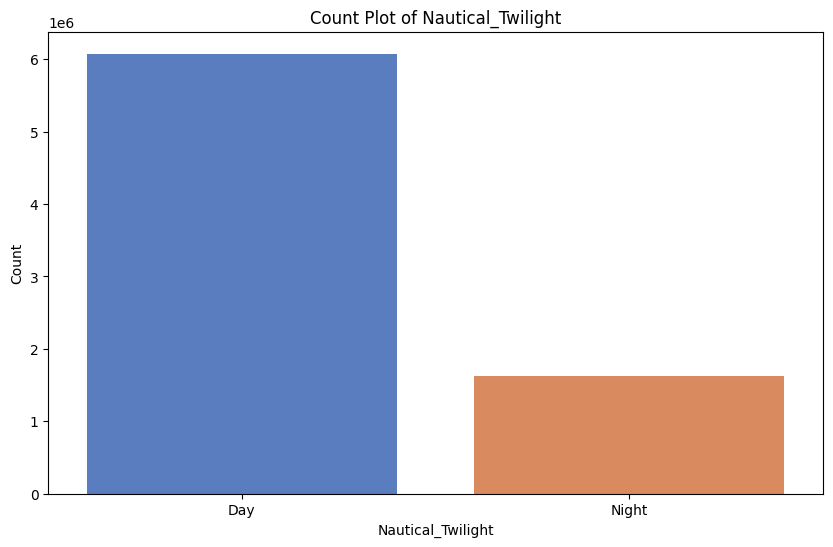

/tmp/ipython-input-3840711427.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df[col], palette='muted')


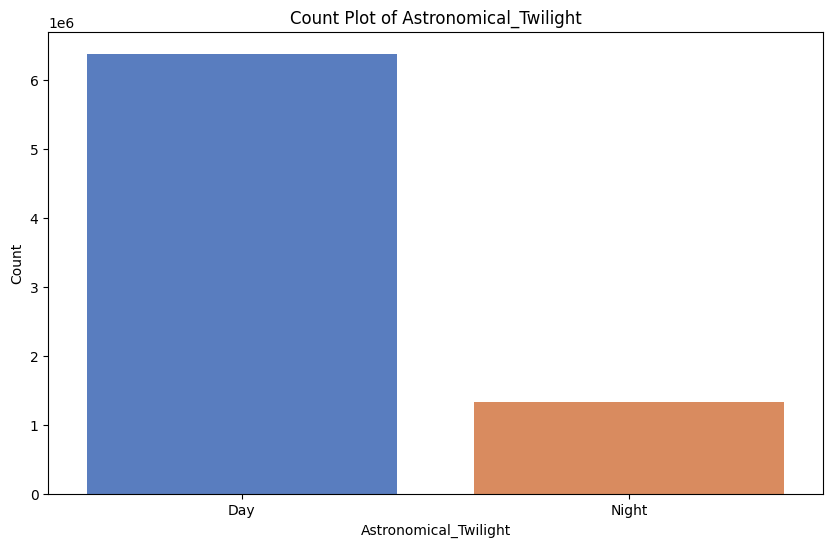

In [ ]:
# for categorical columns countplot
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=df[col], palette='muted')
    plt.title(f'Count Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.show()

In [ ]:
# for col in categorical_cols:
#   print(col)
#   for item in list(df[col].unique()):
#     print(item)
#   print()

Streaming output truncated to the last 5000 lines.
Scotts Mills
Walling
Maize
Cave Springs
Mound Valley
Spivey
Free Soil
Rowan
Aquasco
Heart Butte
Bayard
Chapman
Eldorado Springs
Wellesley Island
Kevin
Ingomar
St Stephens Church
Benedict
Cedarbluff
Skippack
Gauley Bridge
Fishtail
Nahunta
Holder
Collingdale
Rising City
Vaucluse
Gackle
Sale City
Wall Lake
Arnoldsburg
De Graff
Heron
Normanna
Scott Bar
Malcolm
Renick
Edgeley
Polebridge
McCloud-Medicine Lake
District 24 Braddock
Rolling Fork
Yardley
Tumbling Shoals
Hurlburt Field
Clyo
Carter
Deep Water
Zion Crossroads
Belfield
Shaw Air Force Base
Highland City
Hoxie
Dunseith
Winifrede
Layland
Stella
Bloom
Nageezi
Sears
Prairie Du Chien
Anamoose
Cowlesville
Satanta
Broadwater
Mt Gretna
Wisdom
Mt Holly Springs
Amagon
Newkirk
Wikieup
Blue Rapids
Amador City
Moxee
Larimore
Wheelersburg
Hilham
White Earth
Indialantic-Melbourne Beach
Burkesville
Lindside
Rhine
Upper Red Lake
Valley Lee
Gratis
De Borgia
Flournoy
Dovray
Beach Lake
East Sparta
Sarte

In [ ]:
list(df['Wind_Direction'].unique())

['Calm',
 'SW',
 'SSW',
 'WSW',
 'WNW',
 'NW',
 'West',
 'NNW',
 'NNE',
 'South',
 'North',
 'Variable',
 'SE',
 'SSE',
 'ESE',
 'East',
 'NE',
 'ENE',
 'E',
 'W',
 nan,
 'S',
 'VAR',
 'CALM',
 'N']

In [ ]:
df["len"] = df["Start_Time"].astype(str).str.len()
print(df.groupby("len").size())


len
19    6985228
26      60844
29     682322
dtype: int64


In [ ]:
from dateutil import parser

def parse_formats_by_length(series):
    """
    Group datetime strings by length and parse with dateutil.
    Returns a dict: {length: {raw_string: parsed_datetime}}
    """
    results = {}
    series = series.astype(str)

    for length, group in series.groupby(series.str.len()):
        parsed_dict = {}
        for val in group.sample(min(50, len(group)), random_state=42):  # sample up to 50 per group
            try:
                dt = parser.parse(val)
                parsed_dict[val] = dt
            except Exception as e:
                parsed_dict[val] = None
        results[length] = parsed_dict
    return results

formats_detected = parse_formats_by_length(df["Start_Time"])

# Inspect results
for length, parsed in formats_detected.items():
    print(f"\nLength {length}:")
    for raw, dt in parsed.items():
        print(f"{raw} -> {dt}")



Length 19:
2017-01-10 12:07:49 -> 2017-01-10 12:07:49
2018-05-24 19:27:54 -> 2018-05-24 19:27:54
2021-11-08 15:09:15 -> 2021-11-08 15:09:15
2016-11-06 12:56:44 -> 2016-11-06 12:56:44
2022-02-04 16:20:00 -> 2022-02-04 16:20:00
2022-04-06 07:57:56 -> 2022-04-06 07:57:56
2022-09-14 08:16:00 -> 2022-09-14 08:16:00
2022-04-21 10:17:03 -> 2022-04-21 10:17:03
2022-12-01 06:51:52 -> 2022-12-01 06:51:52
2020-08-24 17:23:55 -> 2020-08-24 17:23:55
2017-08-24 14:42:36 -> 2017-08-24 14:42:36
2021-11-07 10:22:30 -> 2021-11-07 10:22:30
2022-03-07 16:02:09 -> 2022-03-07 16:02:09
2020-01-18 10:15:00 -> 2020-01-18 10:15:00
2017-03-19 15:11:36 -> 2017-03-19 15:11:36
2018-01-26 08:12:56 -> 2018-01-26 08:12:56
2022-05-20 15:12:27 -> 2022-05-20 15:12:27
2021-11-11 06:35:21 -> 2021-11-11 06:35:21
2021-11-05 08:55:32 -> 2021-11-05 08:55:32
2020-12-23 13:58:00 -> 2020-12-23 13:58:00
2019-09-04 21:25:00 -> 2019-09-04 21:25:00
2018-08-24 16:54:59 -> 2018-08-24 16:54:59
2021-05-29 15:34:13 -> 2021-05-29 15:34:13

In [ ]:
# Find rows where parsing failed
failed_rows = df[df["DateTimeParsed"].isna()]['Start_Time']

# See how many
print(f"Failed to parse: {len(failed_rows)} rows")

# Show a few examples
print(failed_rows.head(20))


Failed to parse: 743166 rows
3639775    2017-07-23 04:21:01.000000000
3639776    2017-07-23 05:18:46.000000000
3639777    2017-07-23 05:36:01.000000000
3639778    2017-07-23 08:36:01.000000000
3639779    2017-07-23 11:02:16.000000000
3639780    2017-07-23 13:26:16.000000000
3639781    2017-07-23 13:37:31.000000000
3639782    2017-07-23 13:37:31.000000000
3639783    2017-07-23 13:46:31.000000000
3639784    2017-07-23 14:19:32.000000000
3639785    2017-07-23 14:06:01.000000000
3639786    2017-07-23 14:41:16.000000000
3639787    2017-07-23 14:50:17.000000000
3639788    2017-07-23 14:50:17.000000000
3639789    2017-07-23 15:15:46.000000000
3639790    2017-07-23 15:23:16.000000000
3639791    2017-07-23 17:50:17.000000000
3639792    2017-07-23 17:50:17.000000000
3639793    2017-07-23 18:15:46.000000000
3639794    2017-07-23 18:43:31.000000000
Name: Start_Time, dtype: object


In [ ]:
failed_rows.unique()

array(['2017-07-23 04:21:01.000000000', '2017-07-23 05:18:46.000000000',
       '2017-07-23 05:36:01.000000000', ...,
       '2020-11-19 17:58:00.000000000', '2020-11-03 15:59:00.000000000',
       '2020-11-25 01:24:00.000000000'], dtype=object)

In [ ]:
df["Start_Time_Clean"] = df["Start_Time"].str.slice(0, 19)

In [ ]:
df["DateTimeParsed"] = pd.to_datetime(df["Start_Time_Clean"].str.strip(), errors="coerce", utc=True)

In [ ]:
df['DateTimeParsed'].isna().sum()

np.int64(0)

# Bivariate analysis

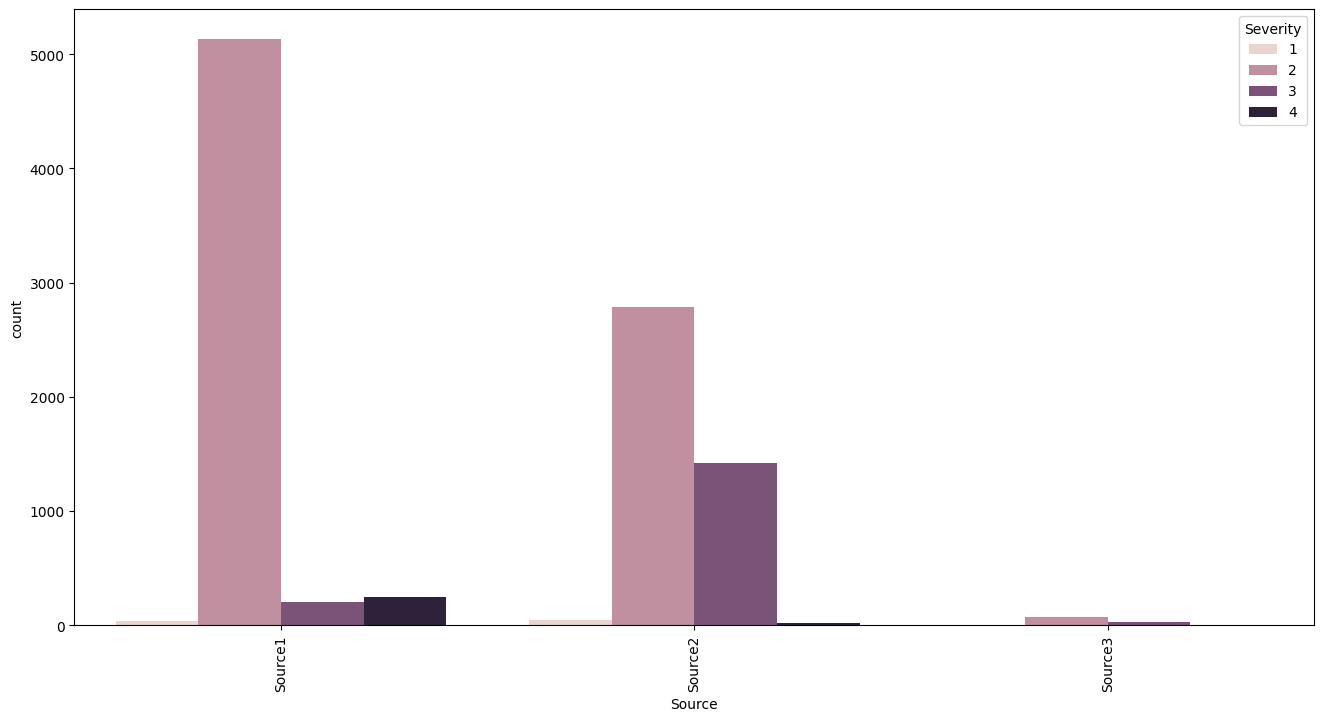

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


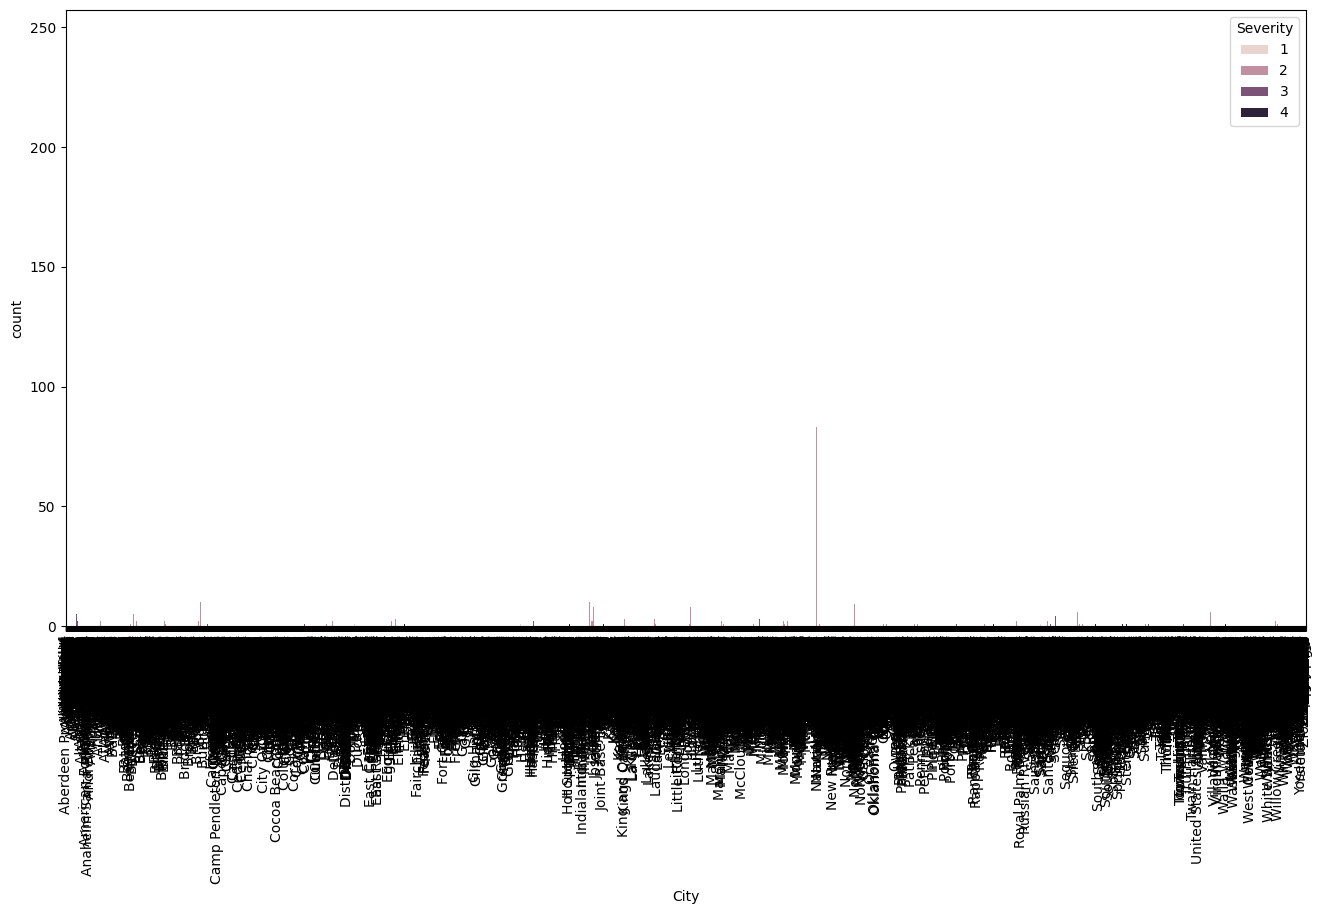

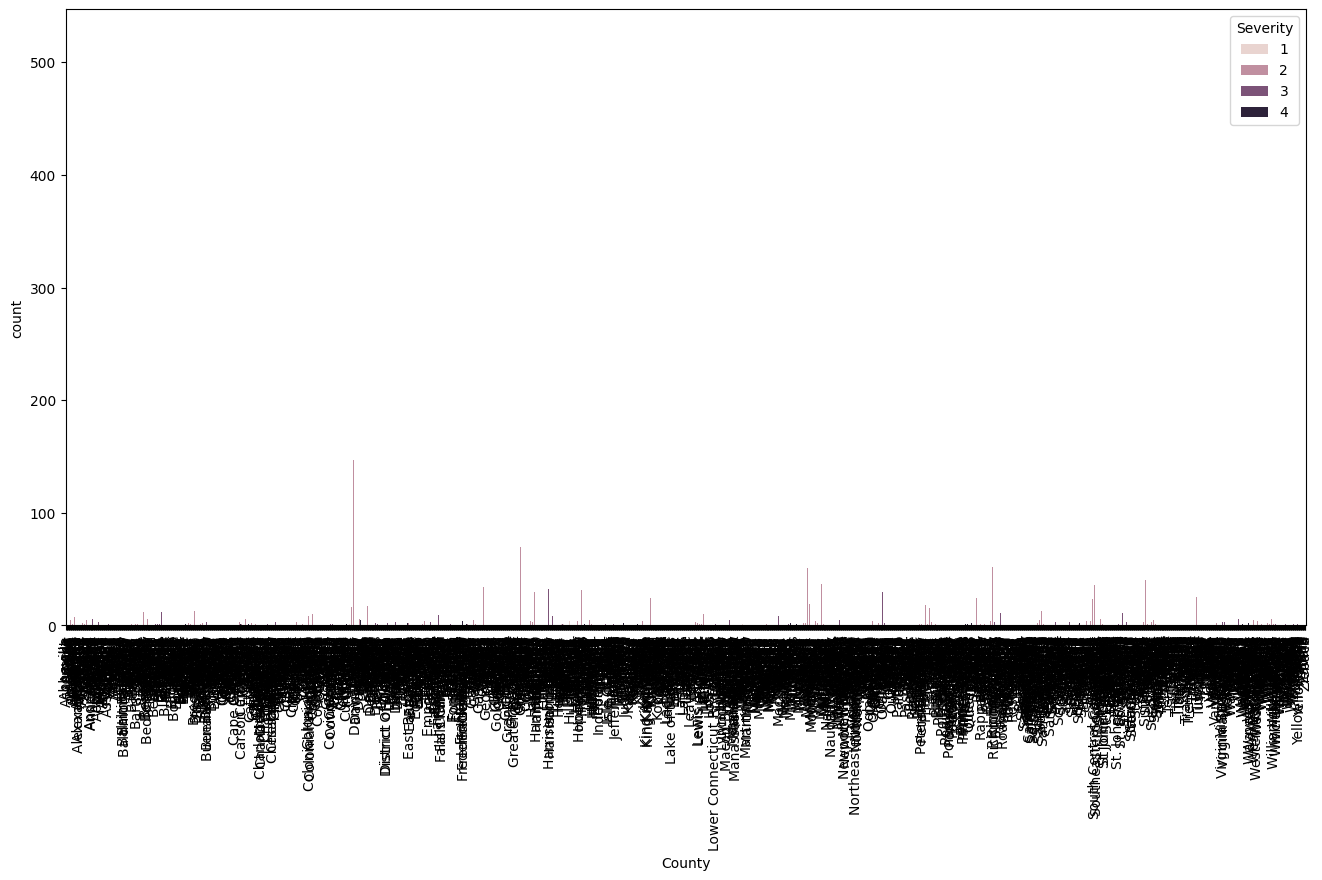

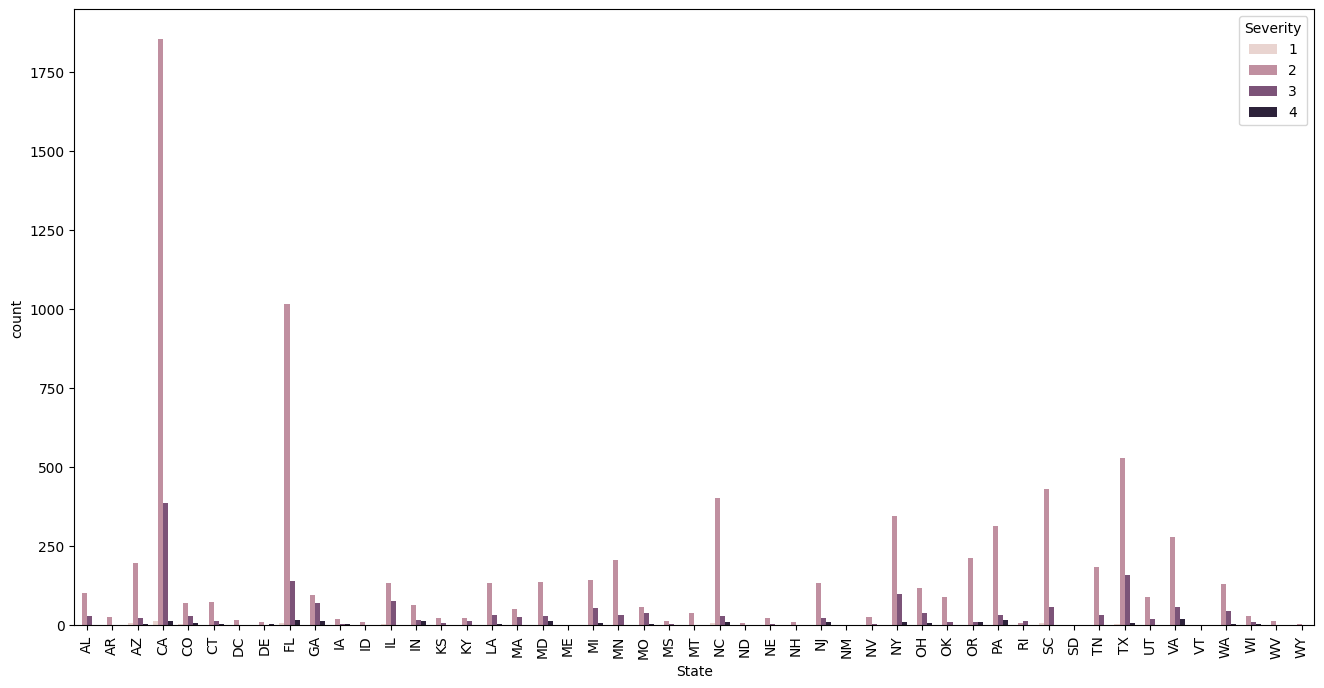

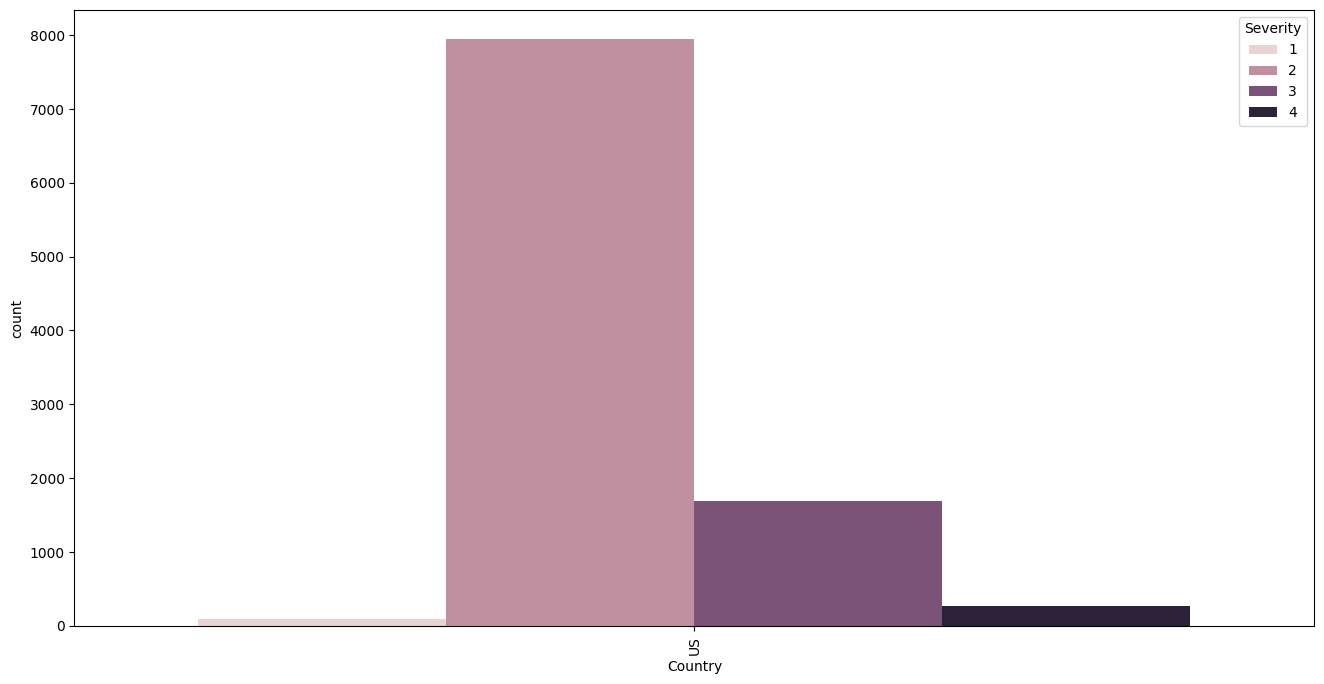

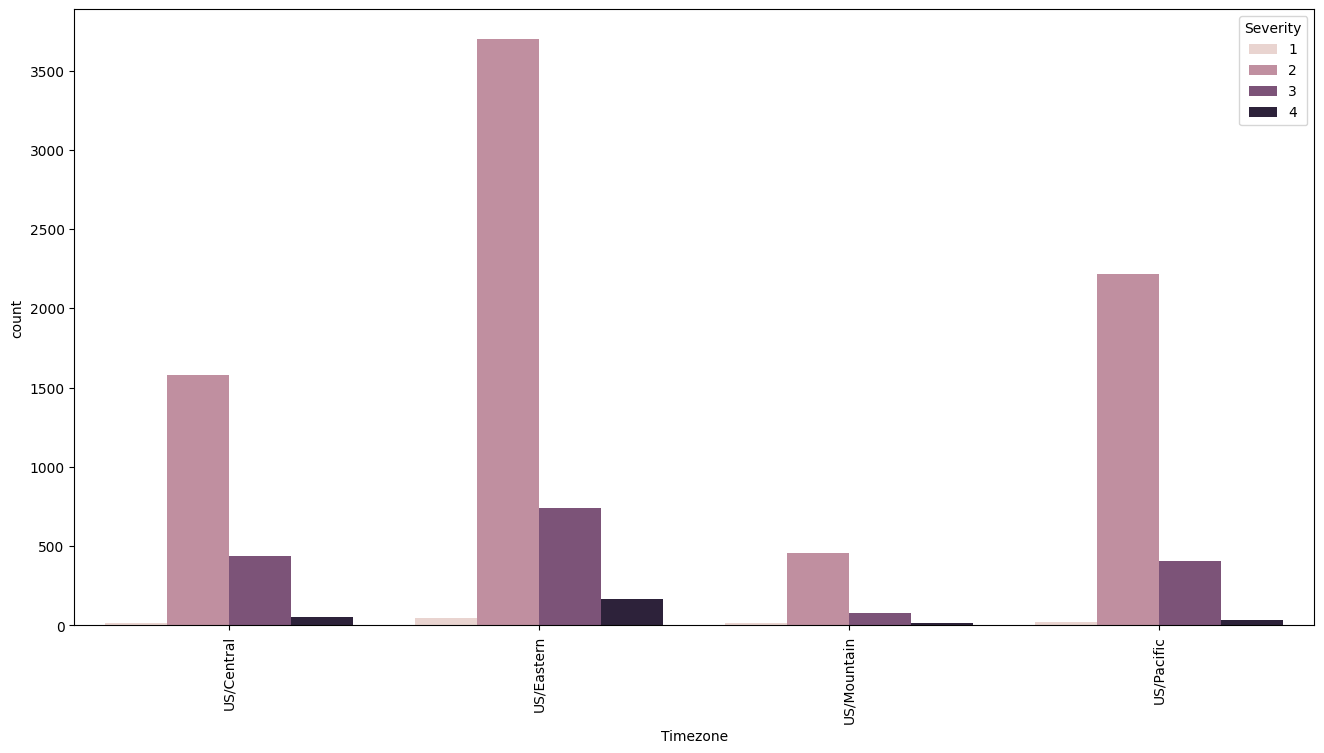

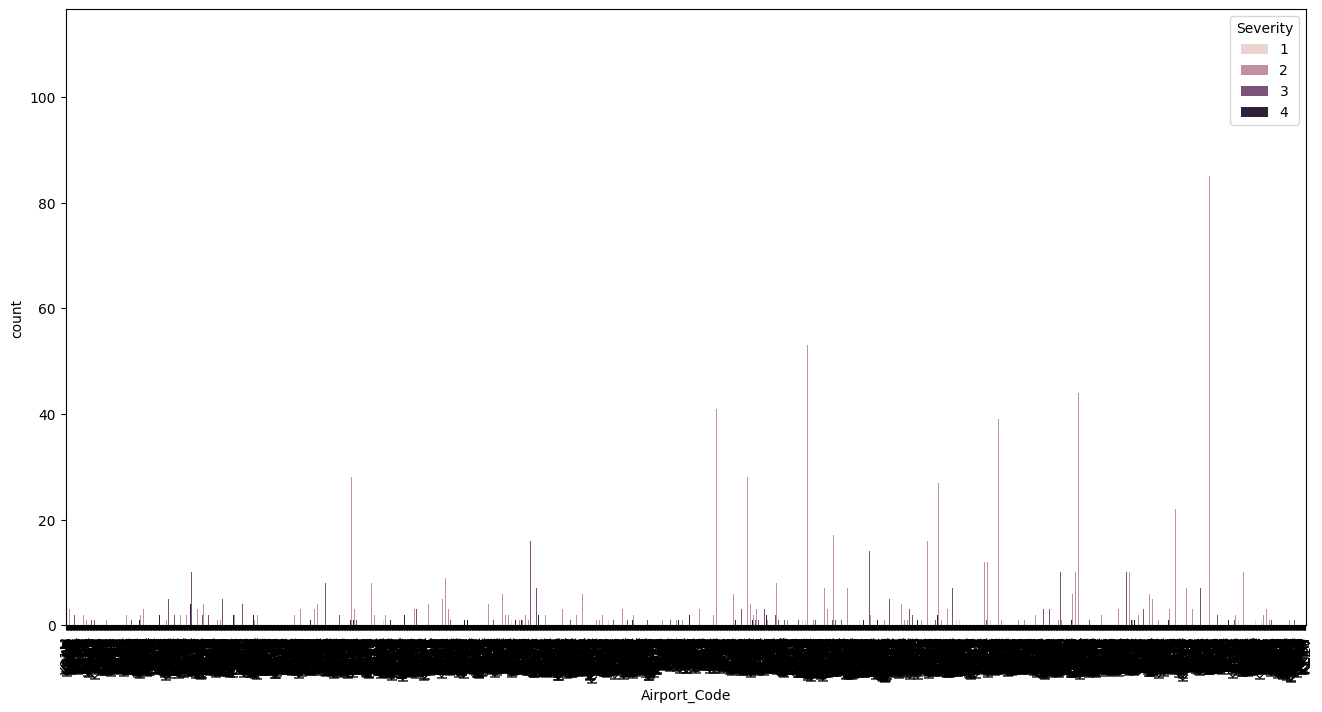

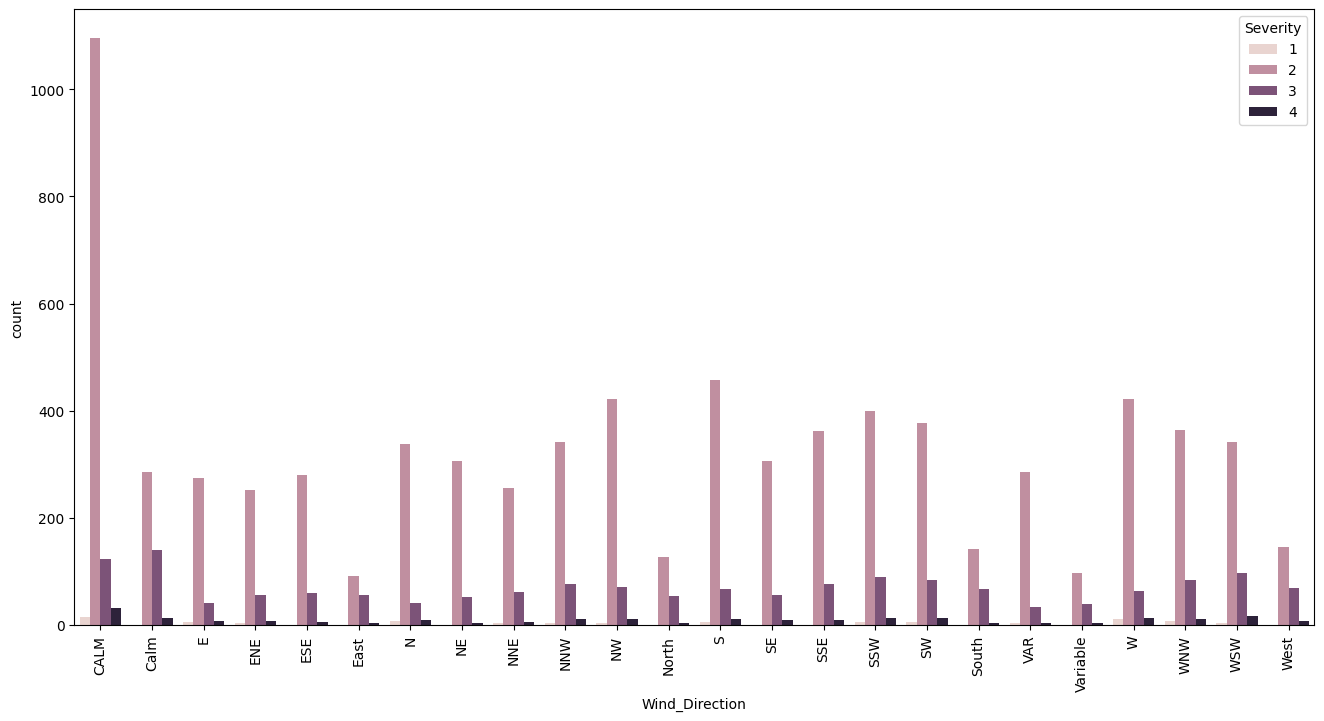

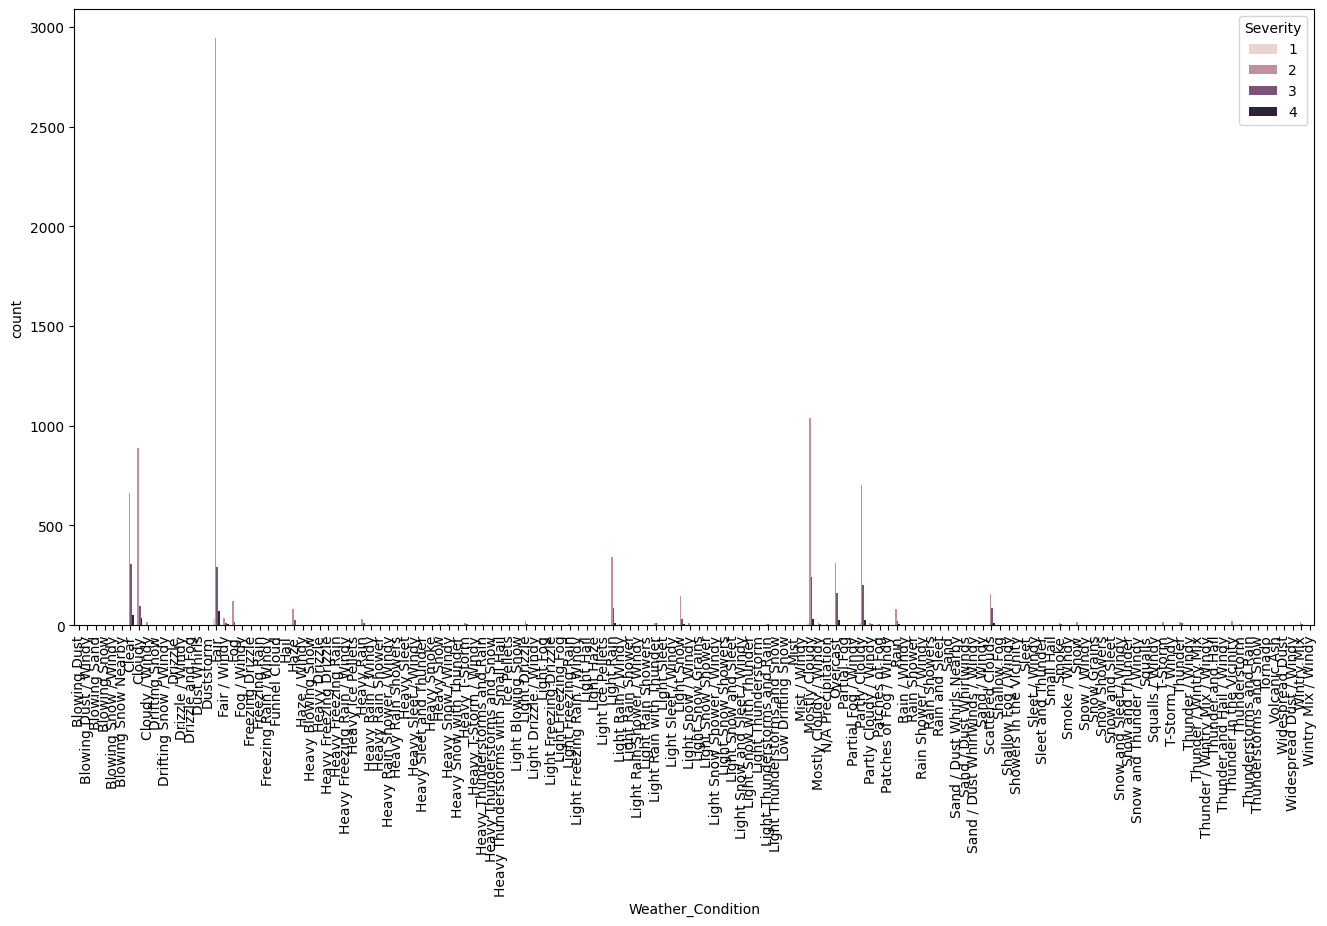

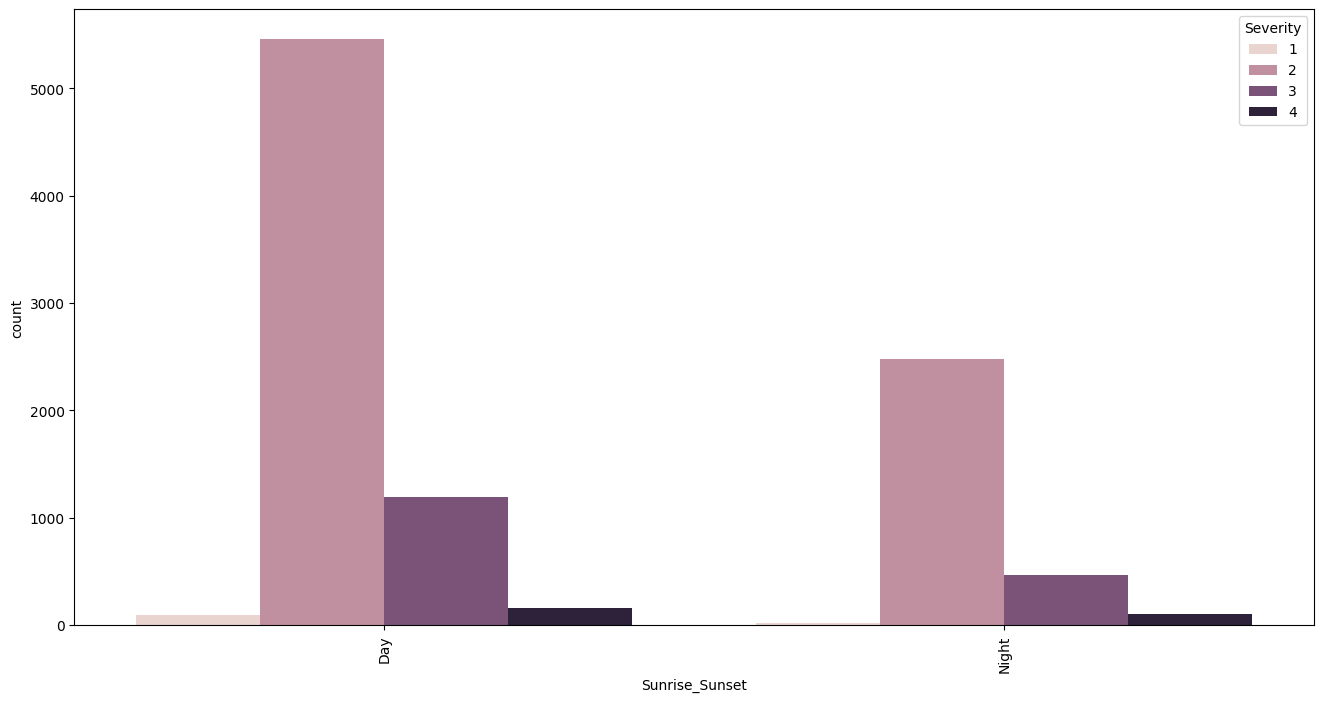

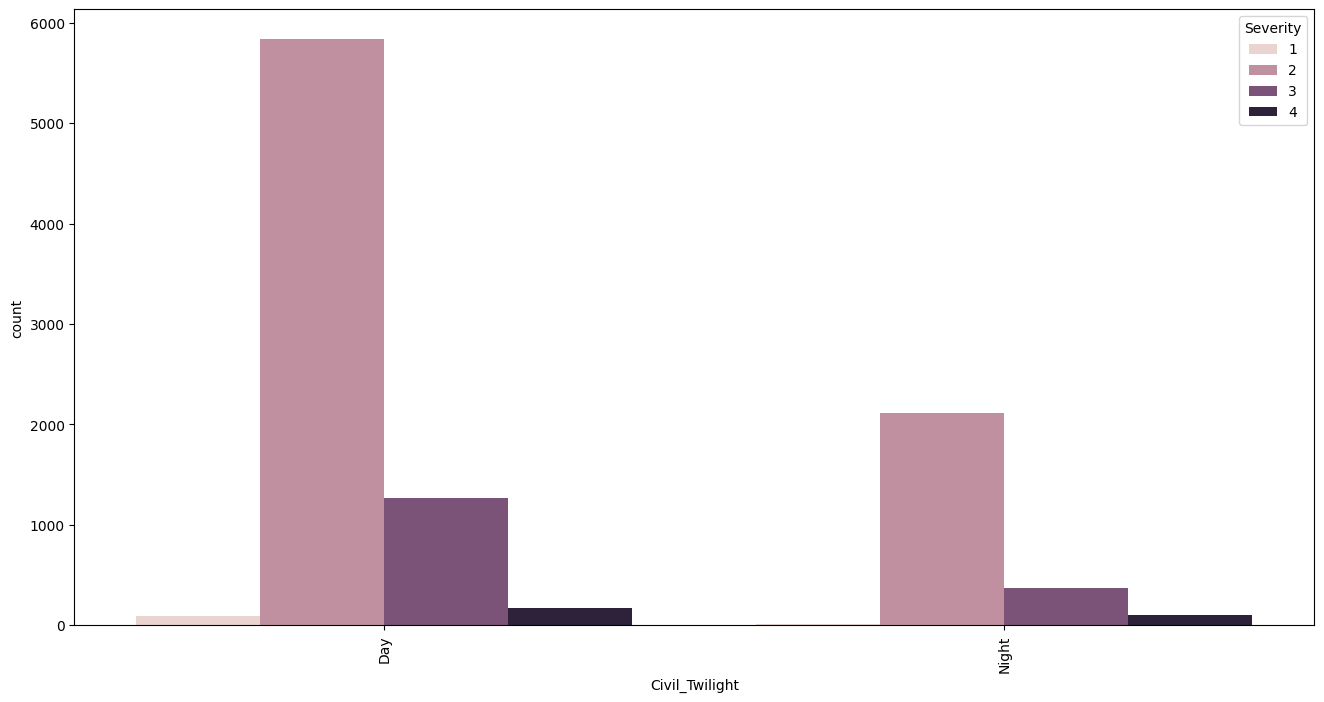

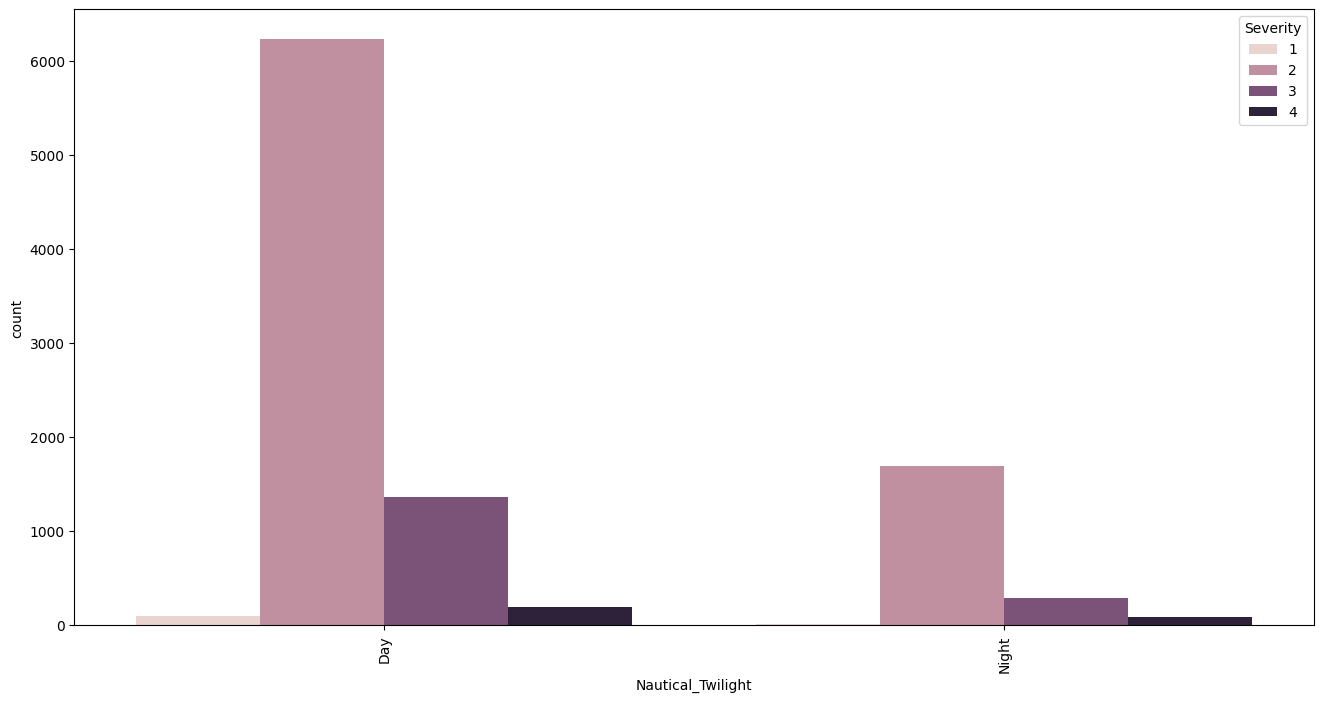

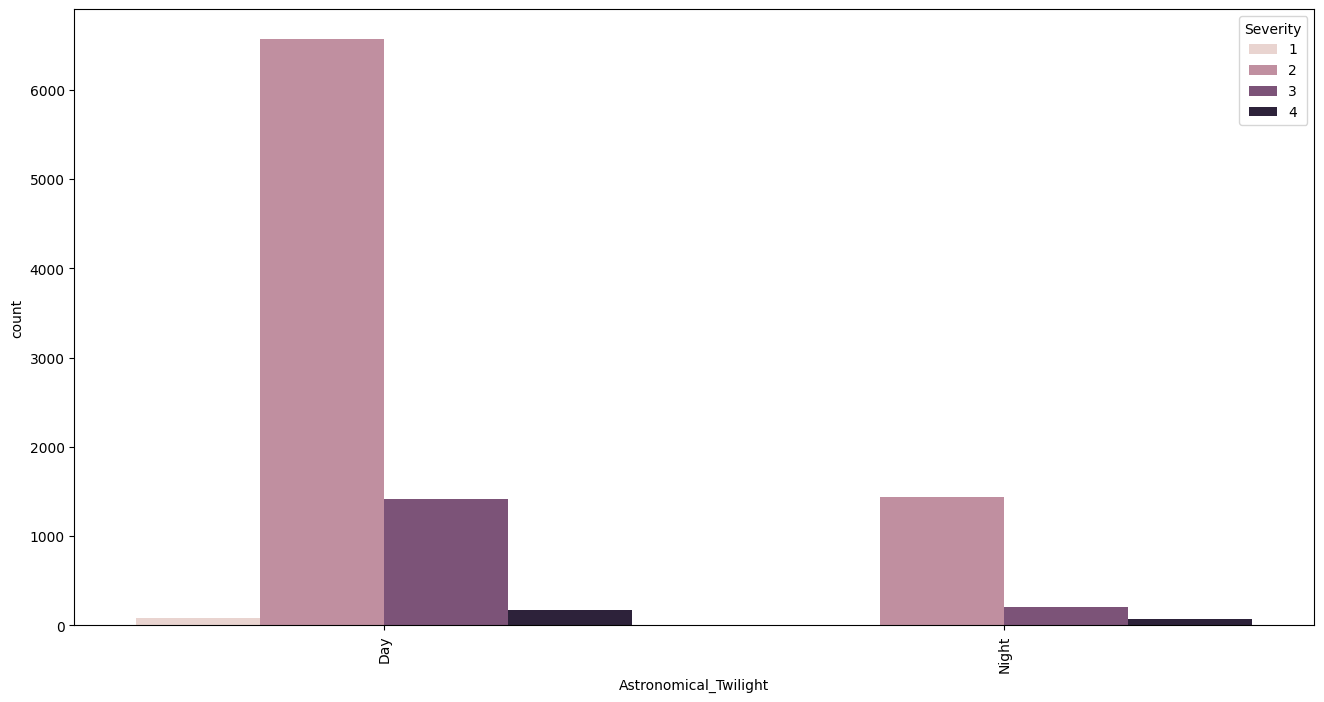

In [ ]:
for col in categorical_cols:
  plt.figure(figsize=(16, 8))
  sns.countplot(x=col, hue="Severity", data=df.sample(10000))
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df["State"], df["Severity"]))


Chi2ContingencyResult(statistic=np.float64(483781.73475013894), pvalue=np.float64(0.0), dof=144, expected_freq=array([[8.80769032e+02, 8.04987412e+04, 1.69880324e+04, 2.67645739e+03],
       [1.98566155e+02, 1.81481466e+04, 3.82988974e+03, 6.03397523e+02],
       [1.48714544e+03, 1.35919102e+05, 2.86836549e+04, 4.51909781e+03],
       [1.51795283e+04, 1.38734773e+06, 2.92778594e+05, 4.61271448e+04],
       [7.92216198e+02, 7.24053688e+04, 1.52800495e+04, 2.40736540e+03],
       [6.18928438e+02, 5.65675658e+04, 1.19377226e+04, 1.88078319e+03],
       [1.62391899e+02, 1.48419654e+04, 3.13217058e+03, 4.93472163e+02],
       [1.22879152e+02, 1.12306595e+04, 2.37005951e+03, 3.73401883e+02],
       [7.67235913e+03, 7.01222715e+05, 1.47982366e+05, 2.33145598e+04],
       [1.47515999e+03, 1.34823680e+05, 2.84524829e+04, 4.48267676e+03],
       [2.29309914e+02, 2.09580023e+04, 4.42286696e+03, 6.96820836e+02],
       [9.91610438e+01, 9.06291991e+03, 1.91259112e+03, 3.01327929e+02],
       [1.472

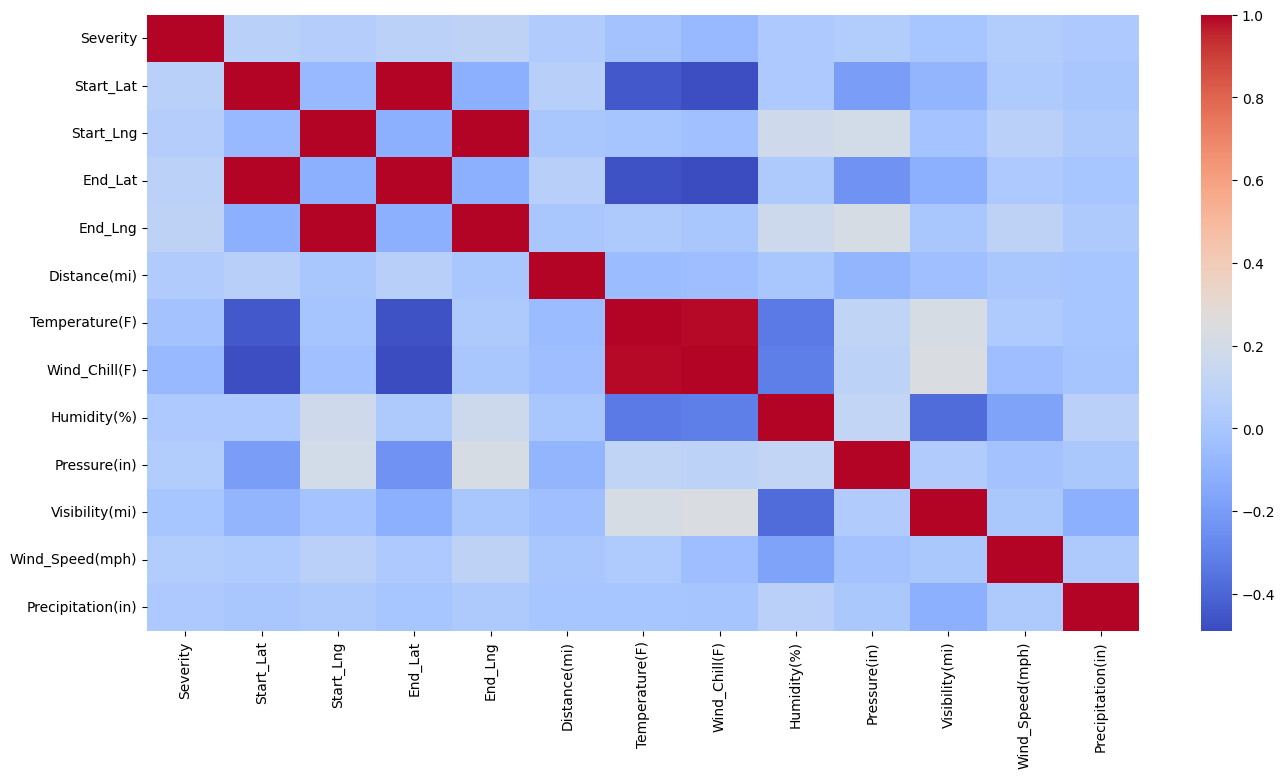

In [ ]:
plt.figure(figsize=(16, 8))
# sns.countplot(x=col, hue="Severity", data=df.sample(10000))
sns.heatmap(df[numerical_cols].corr(), cmap="coolwarm", annot=False)
plt.xticks(rotation=90)
plt.show()

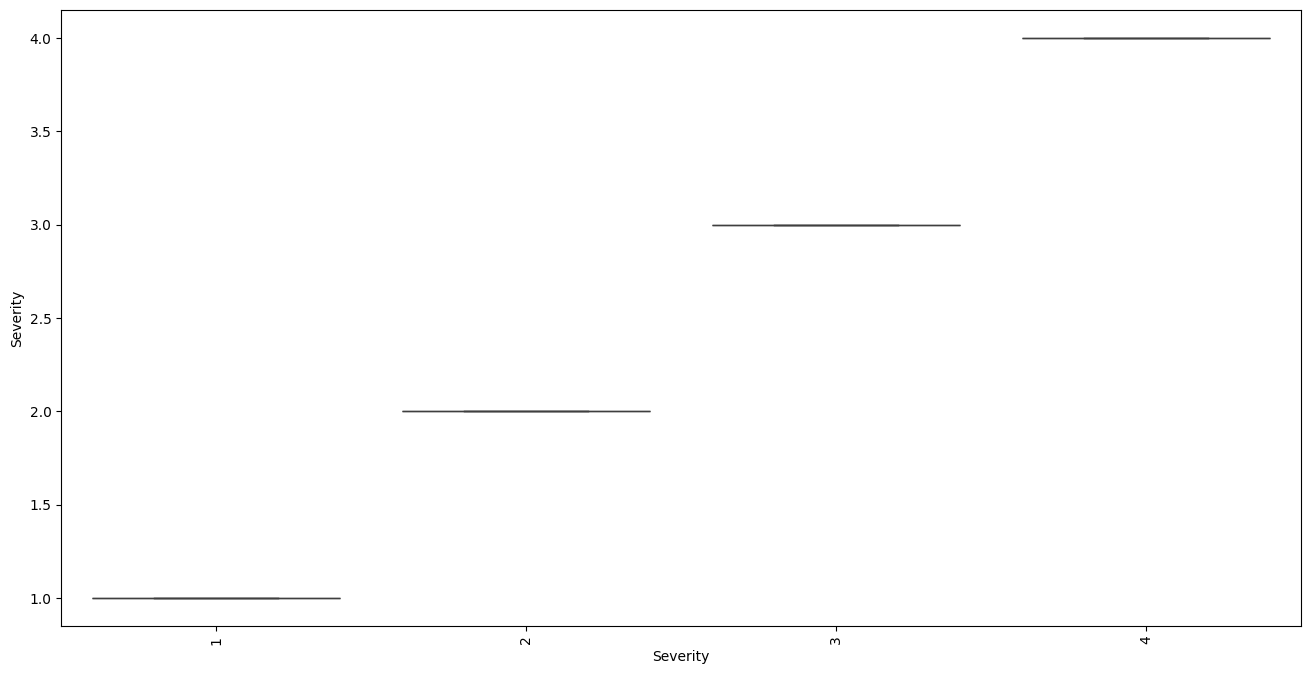

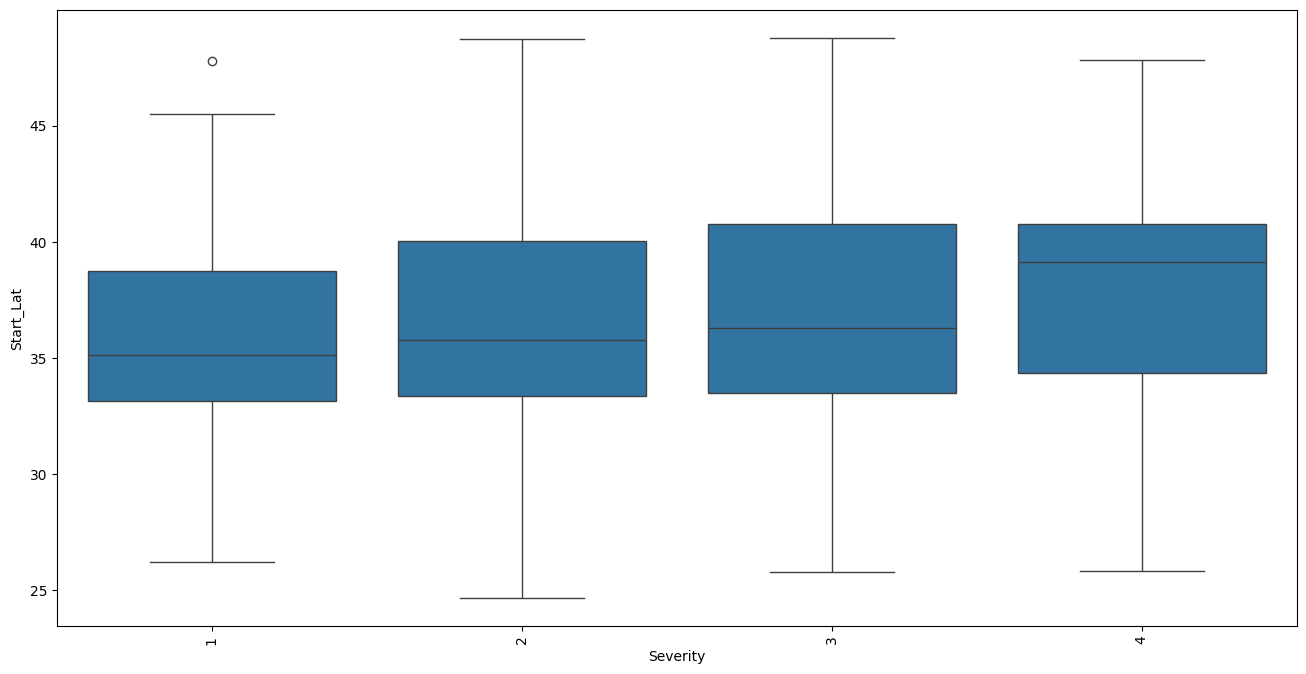

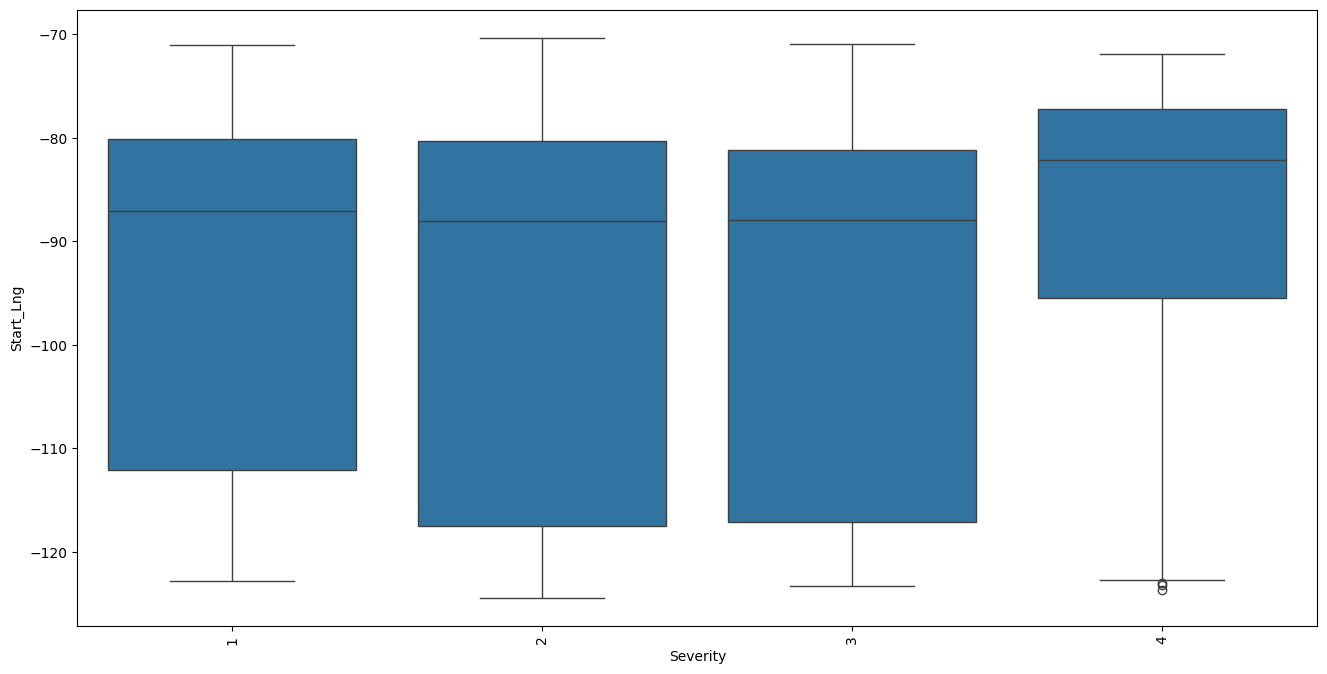

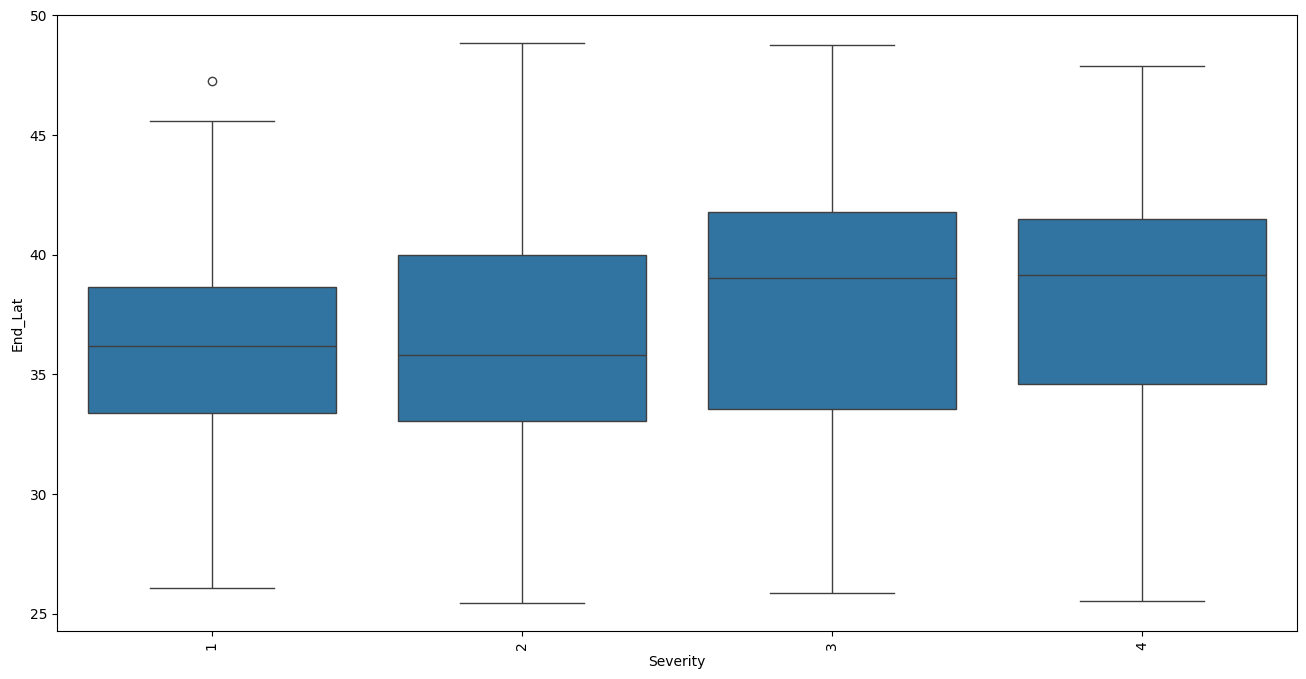

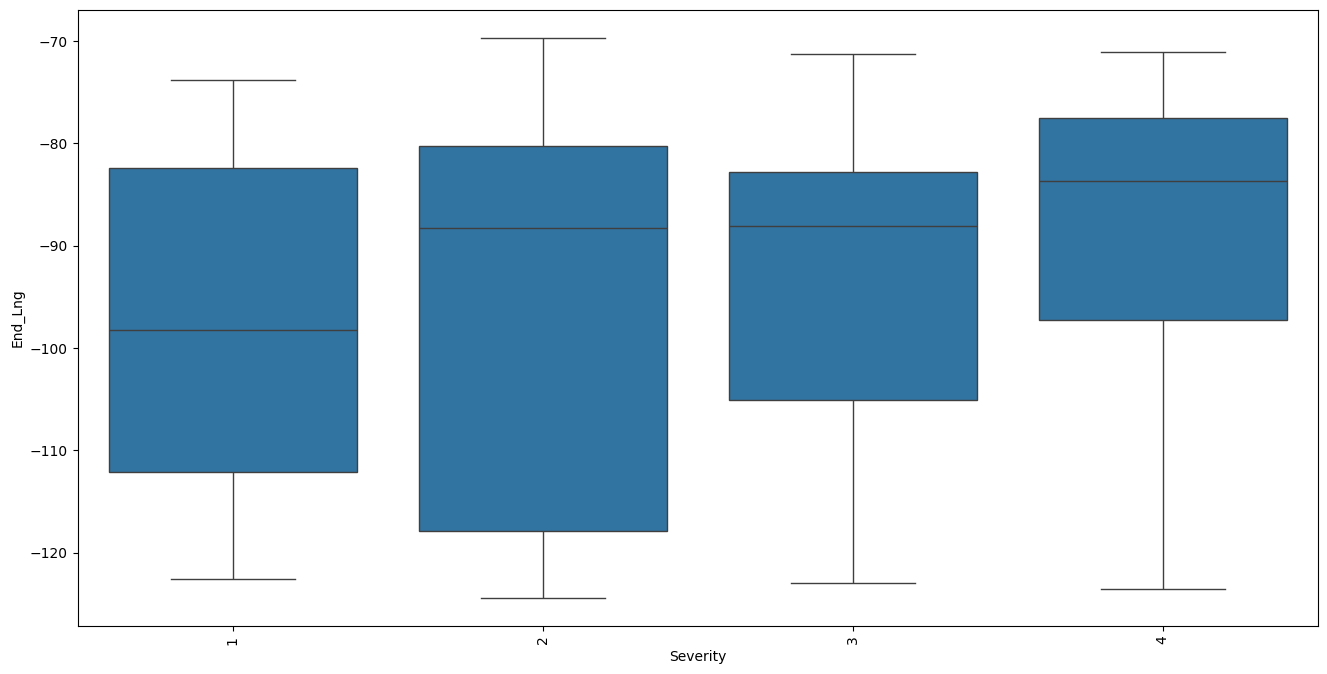

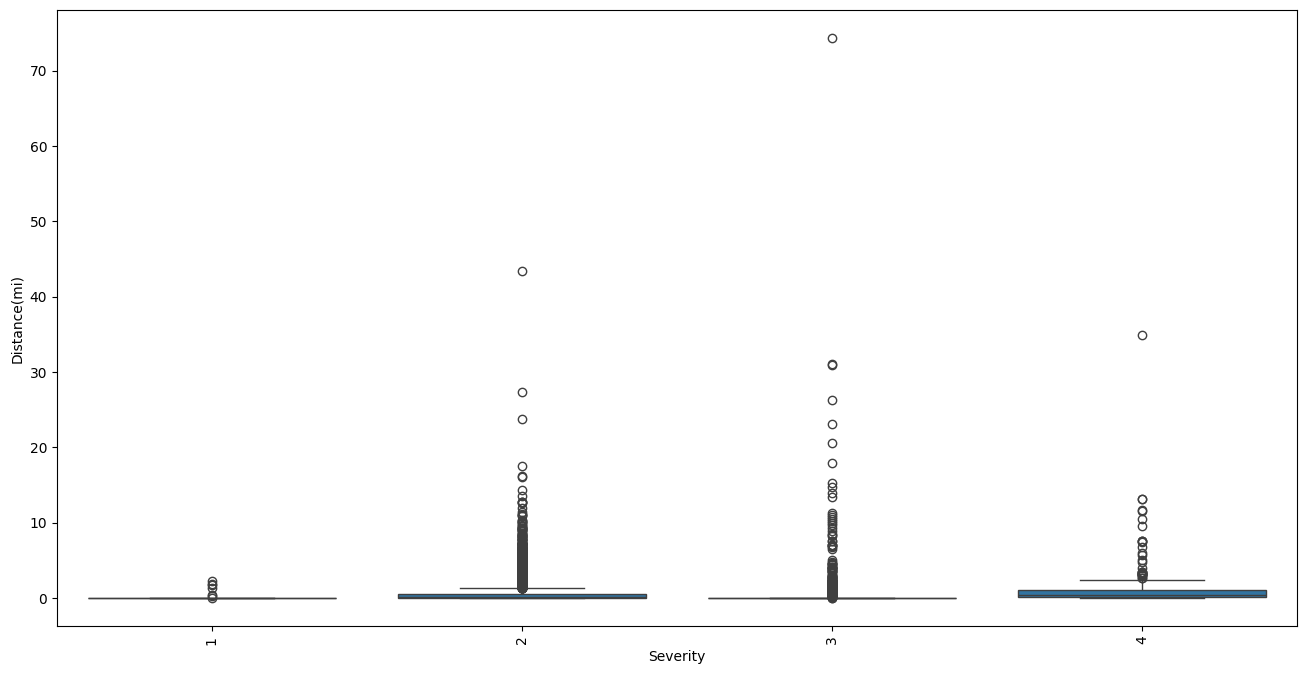

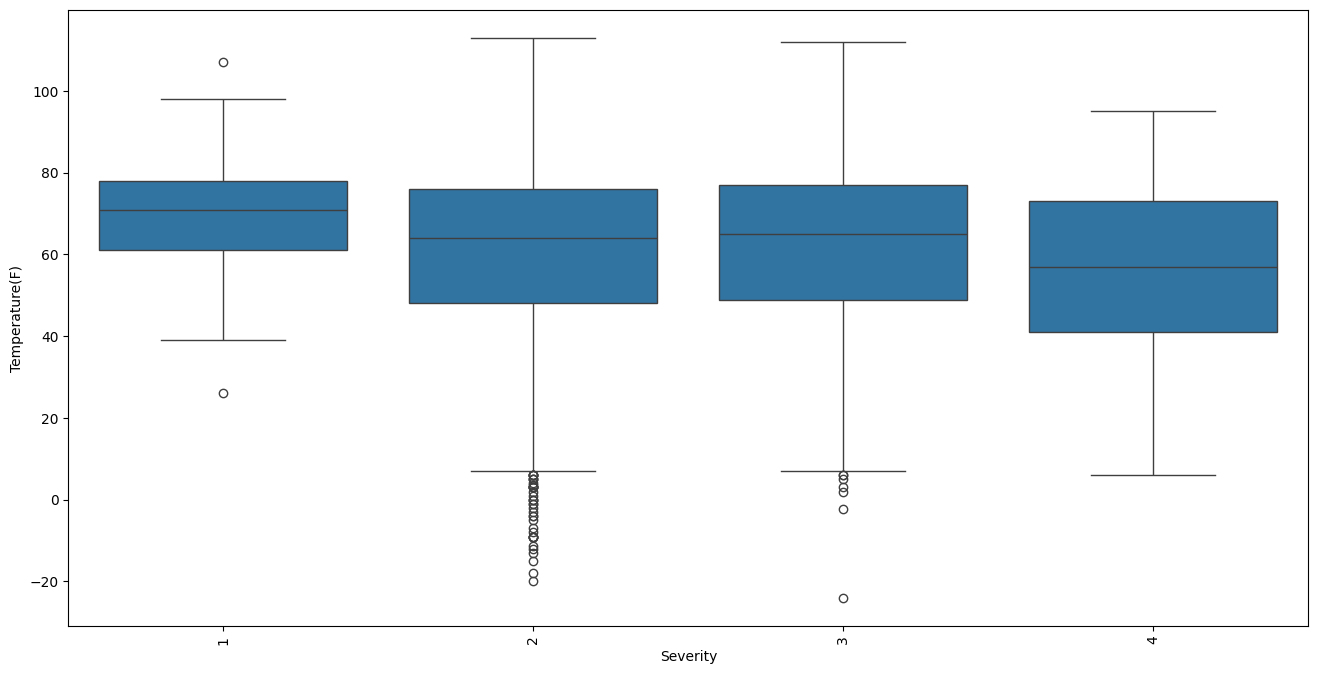

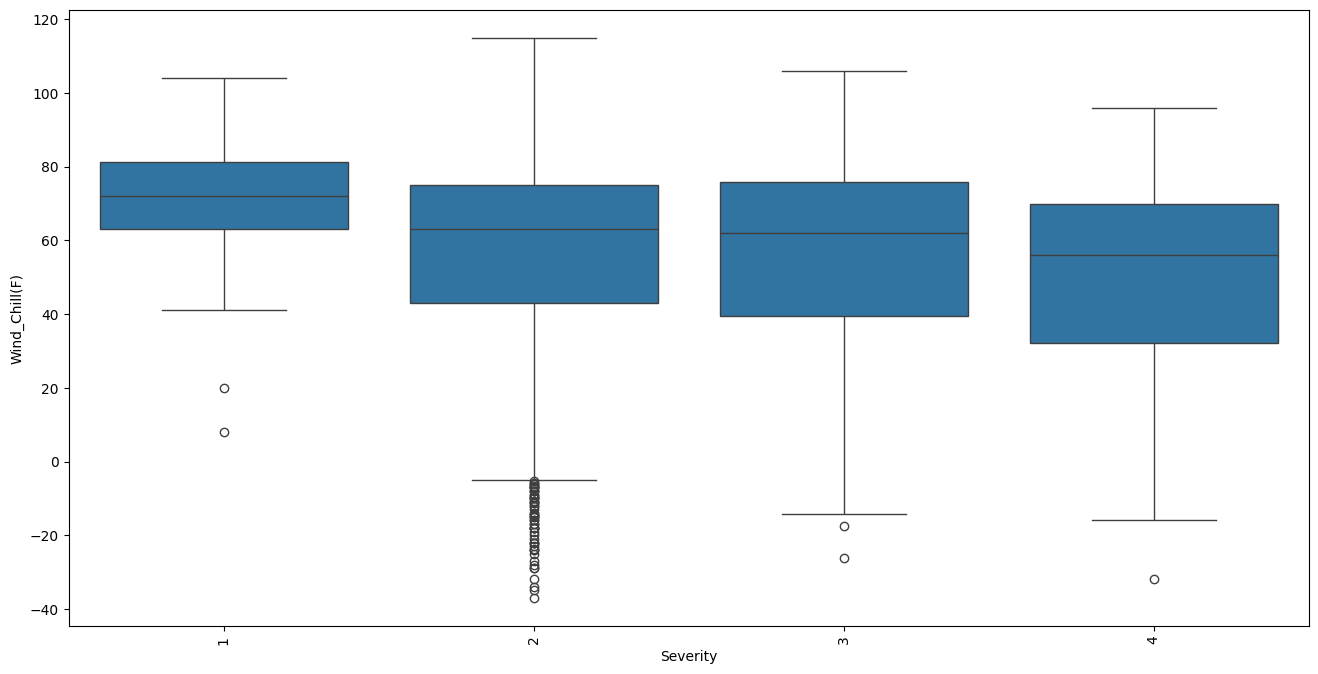

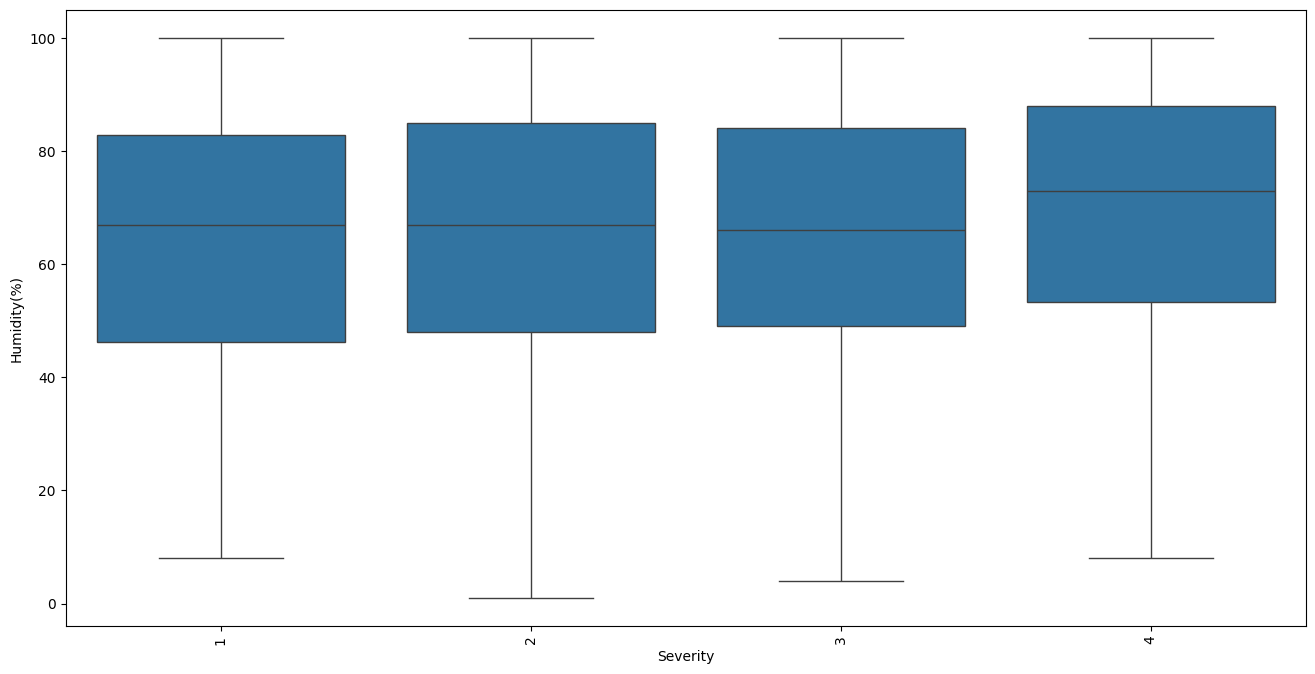

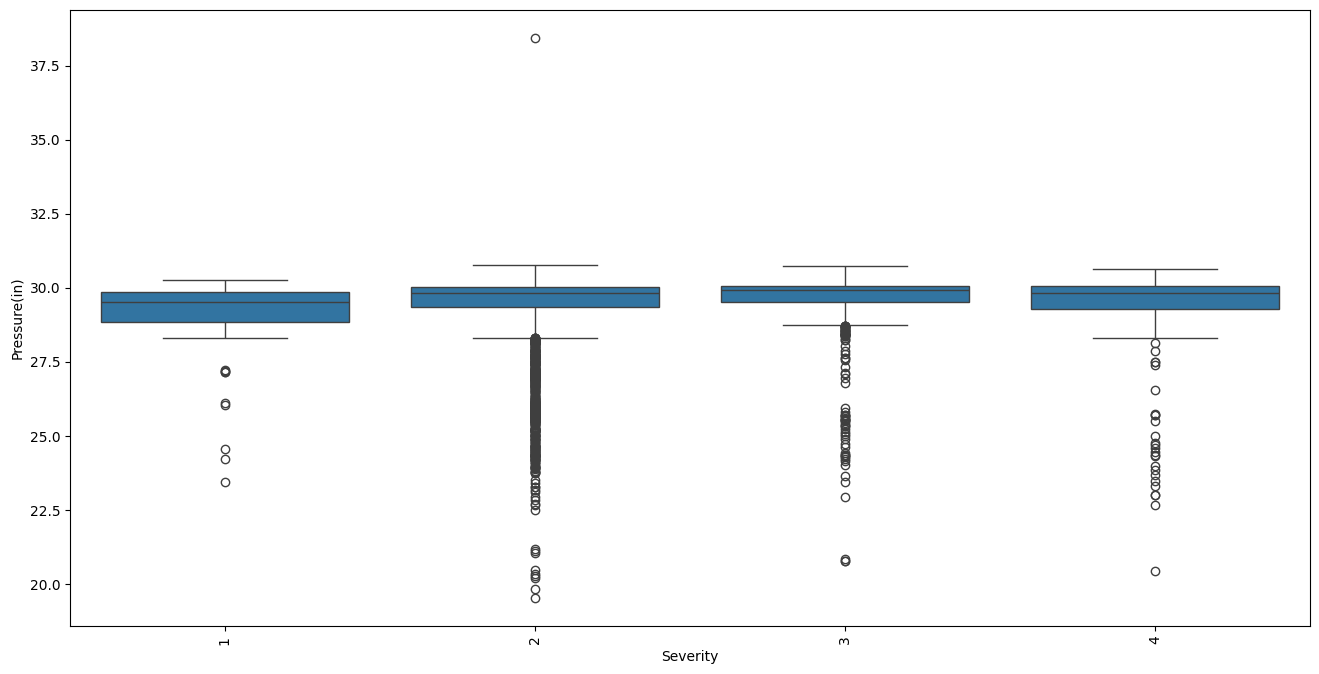

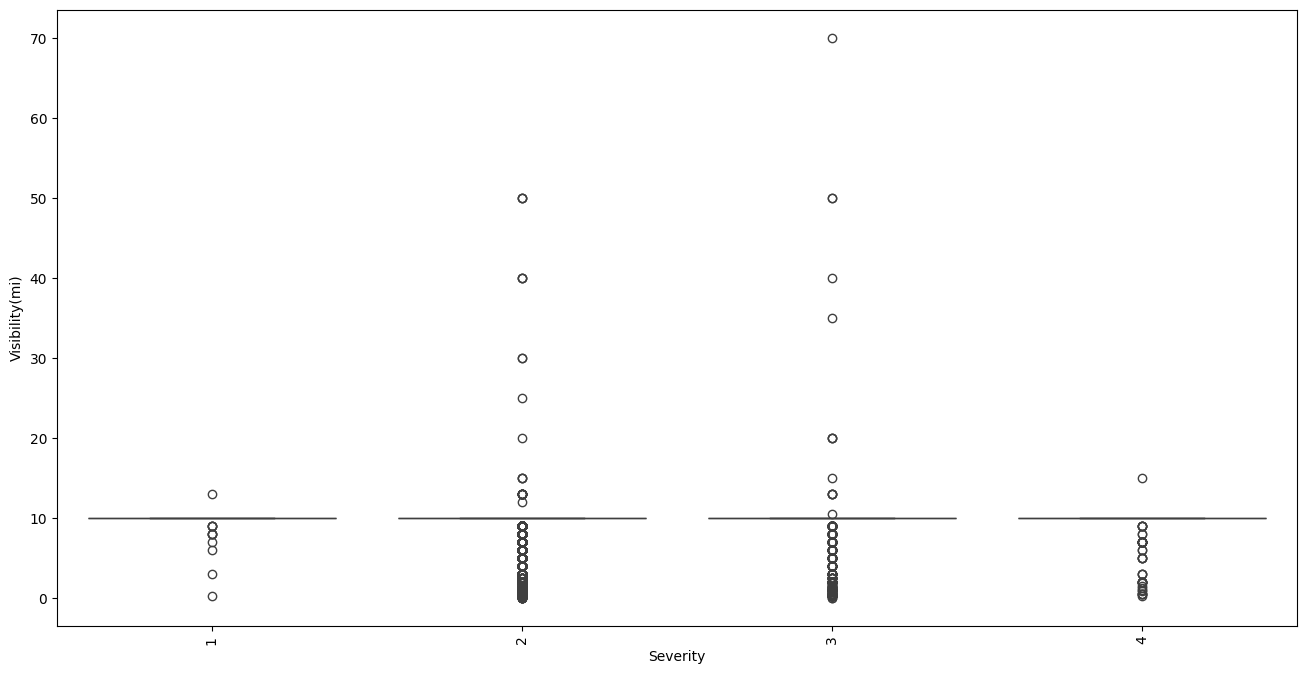

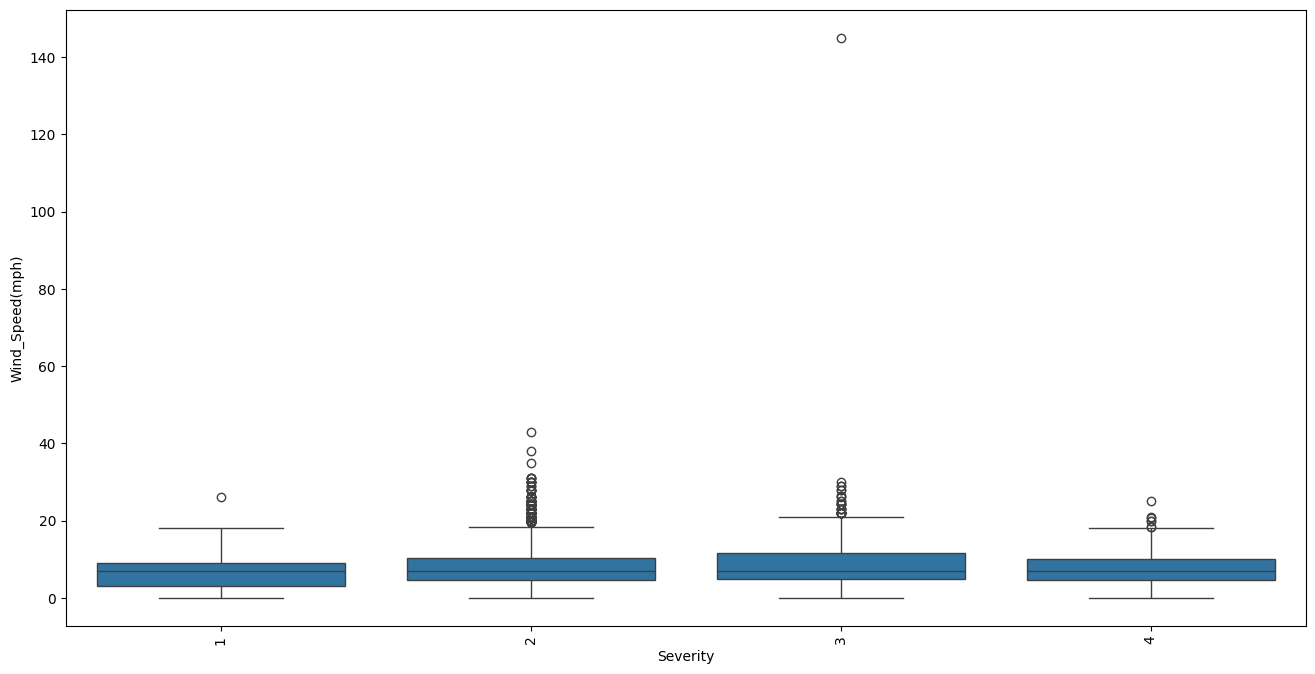

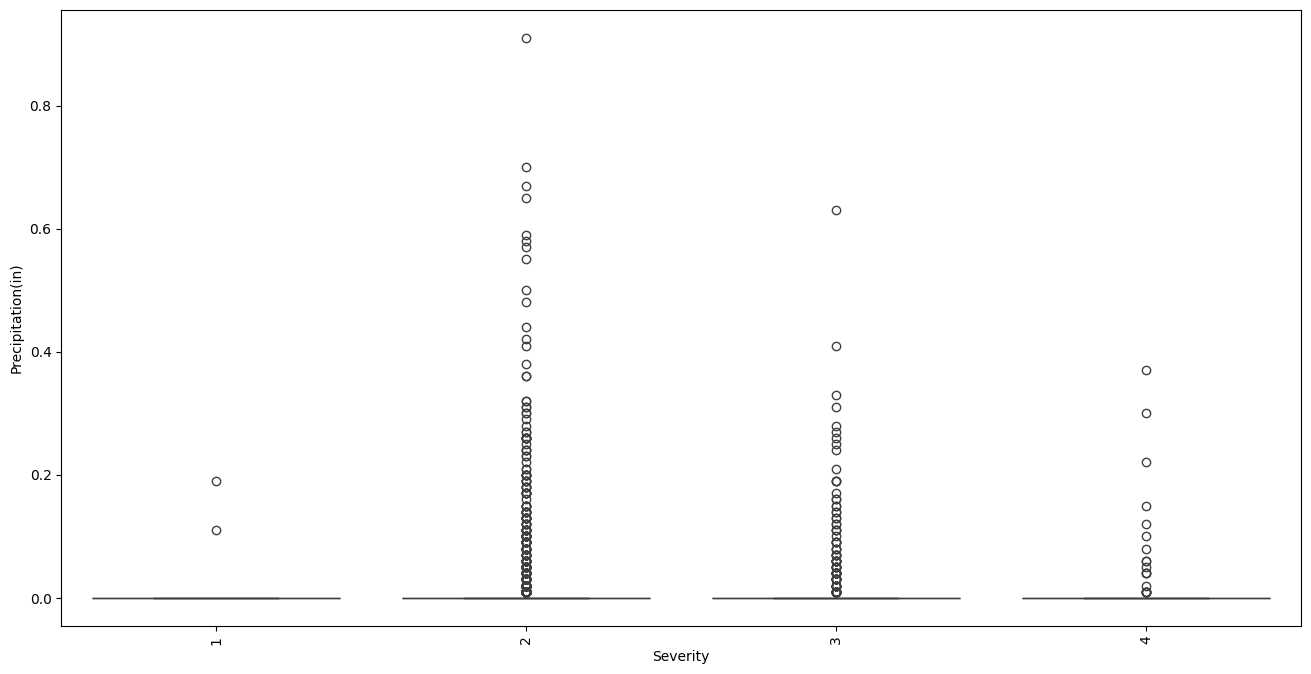

In [ ]:
for col in numerical_cols:
  plt.figure(figsize=(16, 8))
  sns.boxplot(x="Severity", y=col, data=df.sample(10000))
  plt.xticks(rotation=90)
  plt.show()

In [ ]:
not_used_columns = ['ID', 'Source', 'End_Time', 'End_Lat', 'End_Lng',
'Description', 'Street', 'Country', 'Airport_Code', 'Weather_Timestamp',
'County', 'Zipcode', 'Timezone', 'City','Turning_Loop', 'Traffic_Calming', 'Roundabout', 'Bump']

bool_columns = ['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
'Astronomical_Twilight']

high_null_columns = ['Wind_Chill(F)', 'Precipitation(in)']


In [ ]:
new_list = not_used_columns + bool_columns + high_null_columns
list(new_list)

['ID',
 'Source',
 'End_Time',
 'End_Lat',
 'End_Lng',
 'Description',
 'Street',
 'Country',
 'Airport_Code',
 'Weather_Timestamp',
 'County',
 'Zipcode',
 'Timezone',
 'City',
 'Turning_Loop',
 'Traffic_Calming',
 'Roundabout',
 'Bump',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight',
 'Wind_Chill(F)',
 'Precipitation(in)']